# Figures

Isaiah Espinoza (University of Maryland)

In [ ]:

set.seed(1234)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at C:/Users/isaia/Documents/R/My_projects/rea-paper

In [ ]:

# Load data
load(here::here('data', "research-paper-data-20241029.Rdata"))


# shorten and 'unify' factor levels
# Note: this removes variable labels
data <- data |>
  # use `pewmethods` to preserve order of factor levels
  mutate(across(c(q19, q20, q21, q22, q23, q24,
                  q30, q31, q32, q33, q34, q35),
                ~pewmethods::fct_case_when(
    .x %in% c("Not at all confident",
              "Not at all committed",
              "Not at all concerned") ~ "Not at all confident",
    .x %in% c("Not too confident",
              "Not too committed",
              "Not too concerned",
              "Somewhat unconcerned") ~ "Not too confident",
    .x %in% c("Somewhat confident",
              "Somewhat committed",
              "Somewhat concerned") ~ "Somewhat confident",
    .x %in% c("Very confident",
              "Very committed",
              "Very concerned") ~ "Very confident",
    TRUE ~ NA
  ))) |> 
  # unify factor levels
  mutate(across(c(q25, q36), ~ pewmethods::fct_case_when(
    .x == "Very concerned" ~ "Very concerned",
    .x == "Somewhat concerned" ~ "Somewhat concerned",
    .x %in% c("Not too concerned", "Somewhat unconcerned") ~ "Not too concerned",
    .x == "Not at all concerned" ~ "Not at all concerned",
    TRUE ~ NA))) |>
  # reverse factor levels
  mutate(across(c(q25, q36), ~forcats::fct_rev(.)))


In [ ]:

# set ggplot theme that will be used for every plot
# theme_get()
old <- ggplot2::theme_set(ggplot2::theme_bw())  # capture current theme

# set/update new theme
ggplot2::theme_set(
  new = ggplot2::theme_bw(
    base_family = 'TeX Gyre Pagella')+ # set font of ggplots
    theme(legend.position = 'bottom')  # set legend position for all plots
)


In [ ]:

# custom function used to create Likert Plots

# To avoid excessive copy/paste, I made a function to create Likert plots
# it is mostly a wrapper around `ggstats::gglikert`, but with a specific set up
# particular colors, theme, etc. 
likert_plot <- function(data, x, ...,  
                        symmetric = FALSE,
                        variable_labels = NULL,
                        label_size = 2.5,
                        vline = FALSE,
                        title = waiver(), 
                        subtitle = waiver(),
                        caption = waiver(),
                        xlab = waiver()){
  
  p <- ggstats::gglikert(
    data = data, include = {{ x }}, ...,
    variable_labels = variable_labels,
    symmetric = symmetric)+
    
    # customize color
    ggplot2::scale_fill_grey(start = 0.5, end = 0.1)+
    # custom theme
    theme_bw(base_family = "TeX Gyre Pagella")+
    theme(
      legend.position = 'bottom',  # place legend on bottom
      axis.title.y.left = element_blank(), # blank out y-axis label
      axis.text.x = element_blank(), # remove percentage text along x-axis
      strip.text.y.right = element_text(angle = 0) # make facet label horizontal
        )
    
    if (vline==TRUE) {
    p <- p + geom_vline(xintercept = 0, color = 'black', linewidth = 1.2)
  } else {
      p
  }
  
 
  p <- p + ggplot2::labs(..., title = title, subtitle=subtitle, caption=caption, x = xlab)
  p

}


In [ ]:

# function for creating barplots
custom_barplot <- function(data, x, group, title = NULL, subtitle = NULL,
                           caption = NULL, legend_fill = NULL,
                           xlab = NULL){
  b <- data |> 
    group_by({{ group }}, {{ x }}) |> 
    count() |> 
    drop_na() |> 
    group_by({{ group }}) |> 
  mutate(prop = round(n/sum(n), digits = 3),
         pct = prop*100,
         res = str_c(pct,'% (', n, ')', sep = "")) |> 
  ggplot(aes(x = {{ x }}, y = pct, fill = {{ group }}))+
  geom_bar(position = 'dodge', stat = 'identity')+
  geom_text(aes(label = res), position = position_dodge(1.0), size = 2.5, vjust = -0.5)+
  scale_fill_grey(start = 0.5, end = 0.1)
  
  b <- b + ggplot2::labs(
    title = title,
    subtitle = subtitle,
    caption = stringr::str_wrap(caption, width = 99),
    fill = legend_fill,
    y = "Percentage",
    x = stringr::str_wrap(xlab, width = 85))
  b
}


In [ ]:

# assign items to particular vectors to avoid copy/pasting
trust.az.items <- data |> select(q19, q20, q21, q22, q24) |> colnames() |> dput()
trust.lcl.items <- data |> select(q30, q31, q32, q33, q35)|> colnames() |> dput()
distrust.az.items <- data |> select(q28_1:q28_5)|> colnames() |> dput()
distrust.lcl.items <- data |> select(q40_1:q40_5)|> colnames() |> dput()

# variable labels for az and local area items, respectively
trust.az.varlabels <- c(
  q19 = "Votes counted as intended",
  q20 = "Election officials will do good job",
  q21 = "Election workers will be committed",
  q22 = "Voting process will be fair",
  q24 = "Election technology will be secure"
)

distrust.az.varlabels <- c(
  q28_1 = "Voter fraud will occur",
  q28_2 = "Many votes won't be counted",
  q28_3 = "Many voters will be turned away",
  q28_4 = "Foreign Interference",
  q28_5 = "Election officials will discourage voting"
)

trust.lcl.varlabels <- c(
  q30 = "Votes counted as intended",
  q31 = "Election officials will do good job",
  q32 = "Election workers will be committed",
  q33 = "Voting process will be fair",
  q35 = "Election technology will be secure"
)

distrust.lcl.varlabels <- c(
  q40_1 = "Voter fraud will occur",
  q40_2 = "Many Votes won't be counted",
  q40_3 = "Many voters will be turned away",
  q40_4 = "Foreign Interference",
  q40_5 = "Election officials will discourage voting"
)


## Trust in Elections across sample

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

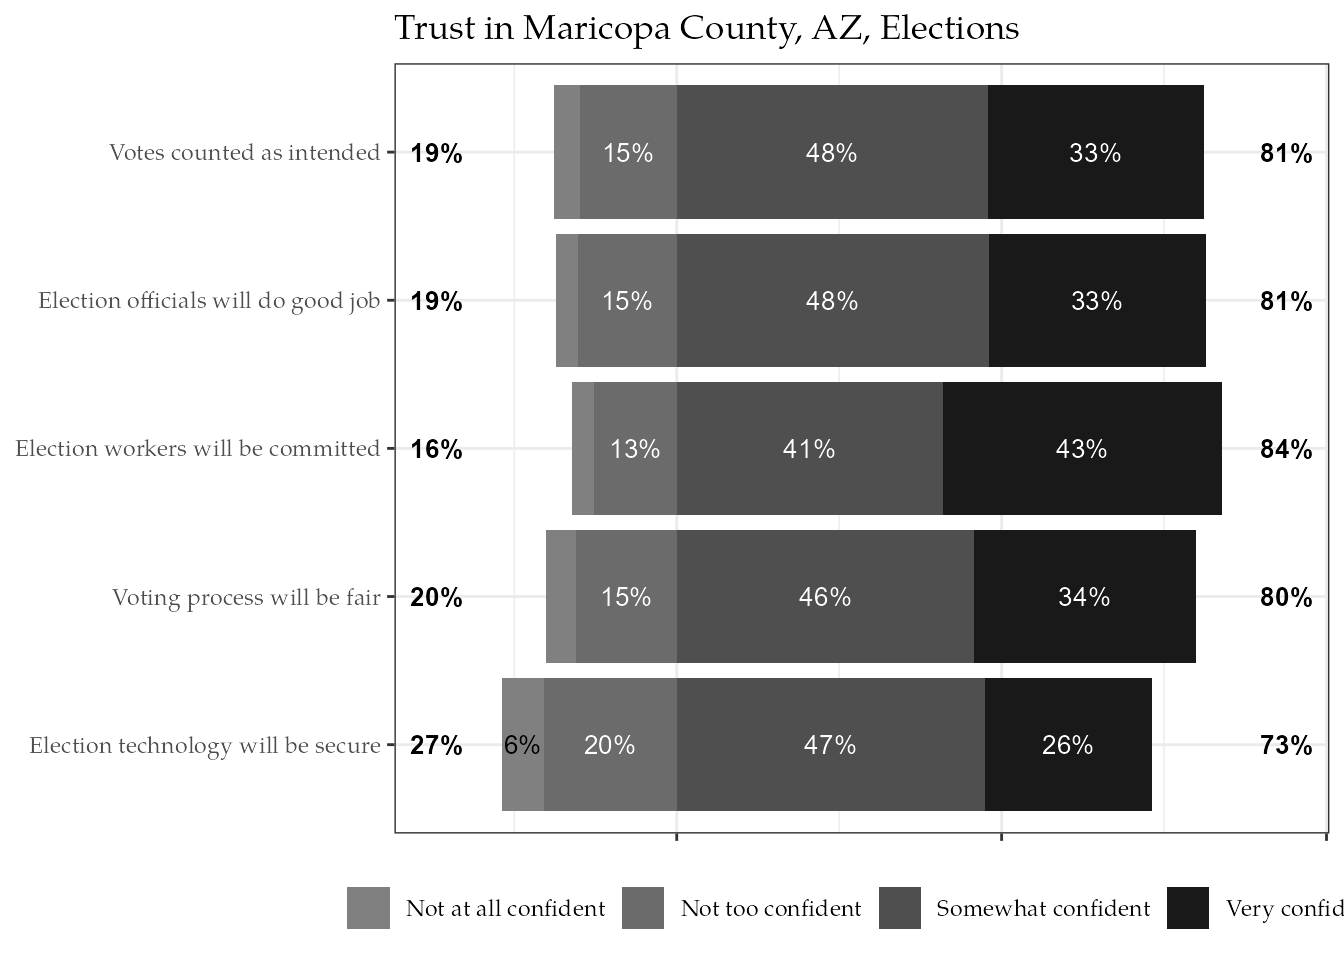

In [ ]:

# plot of trust in elections  

# plot of trust in AZ elections 
trust.likertplot.az <- data |> likert_plot(
  x = all_of(trust.az.items),
  variable_labels = trust.az.varlabels,
  title = "Trust in Maricopa County, AZ, Elections"
)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

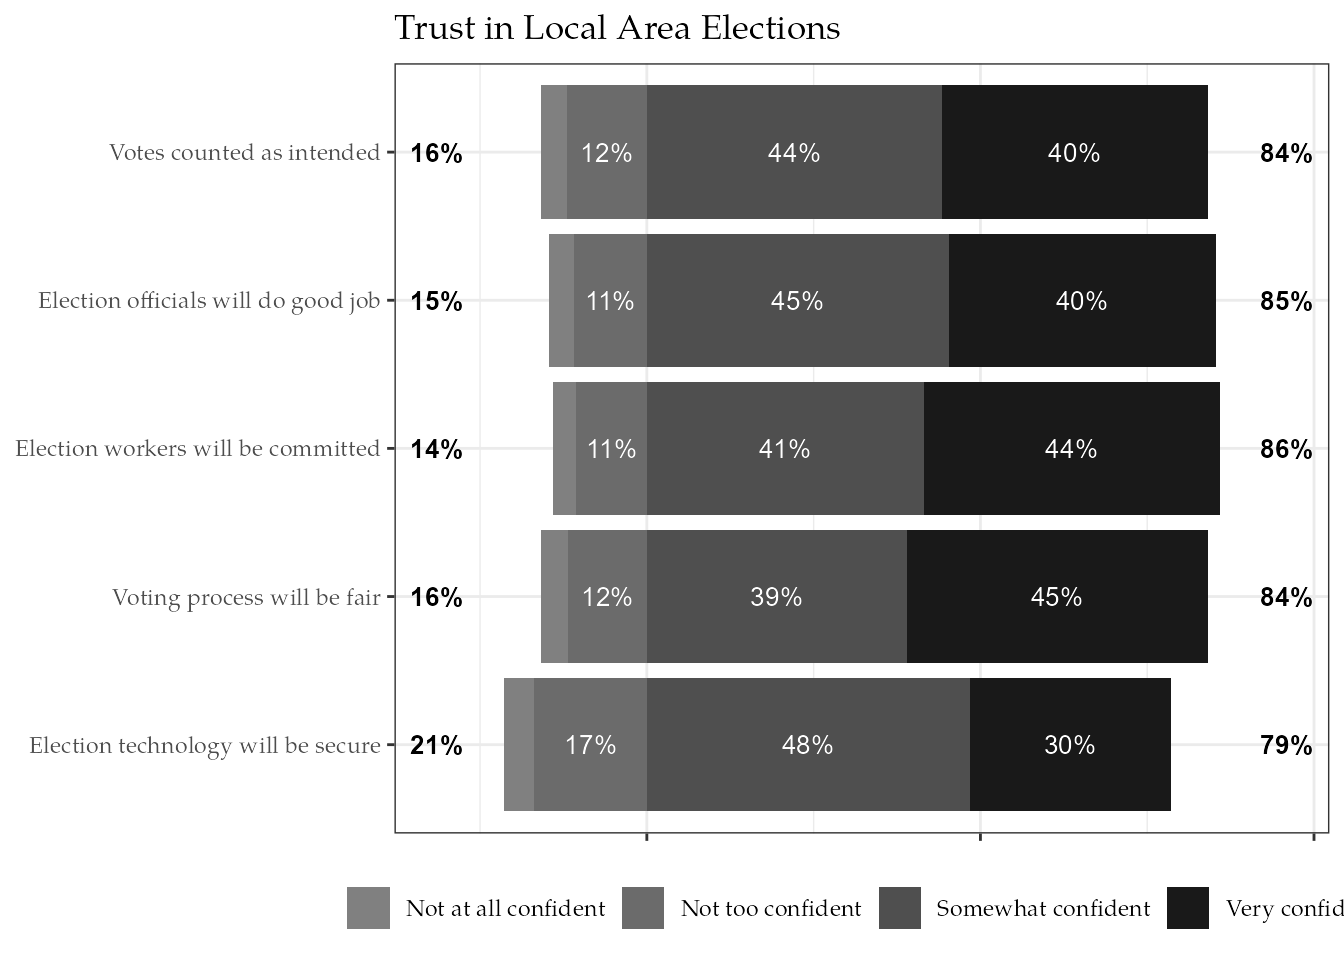

In [ ]:

# plot of trust in Local Area elections 
trust.likertplot.lcl <- likert_plot(
  data = data, 
  x = all_of(trust.lcl.items),
  variable_labels = trust.lcl.varlabels,
  title = "Trust in Local Area Elections")


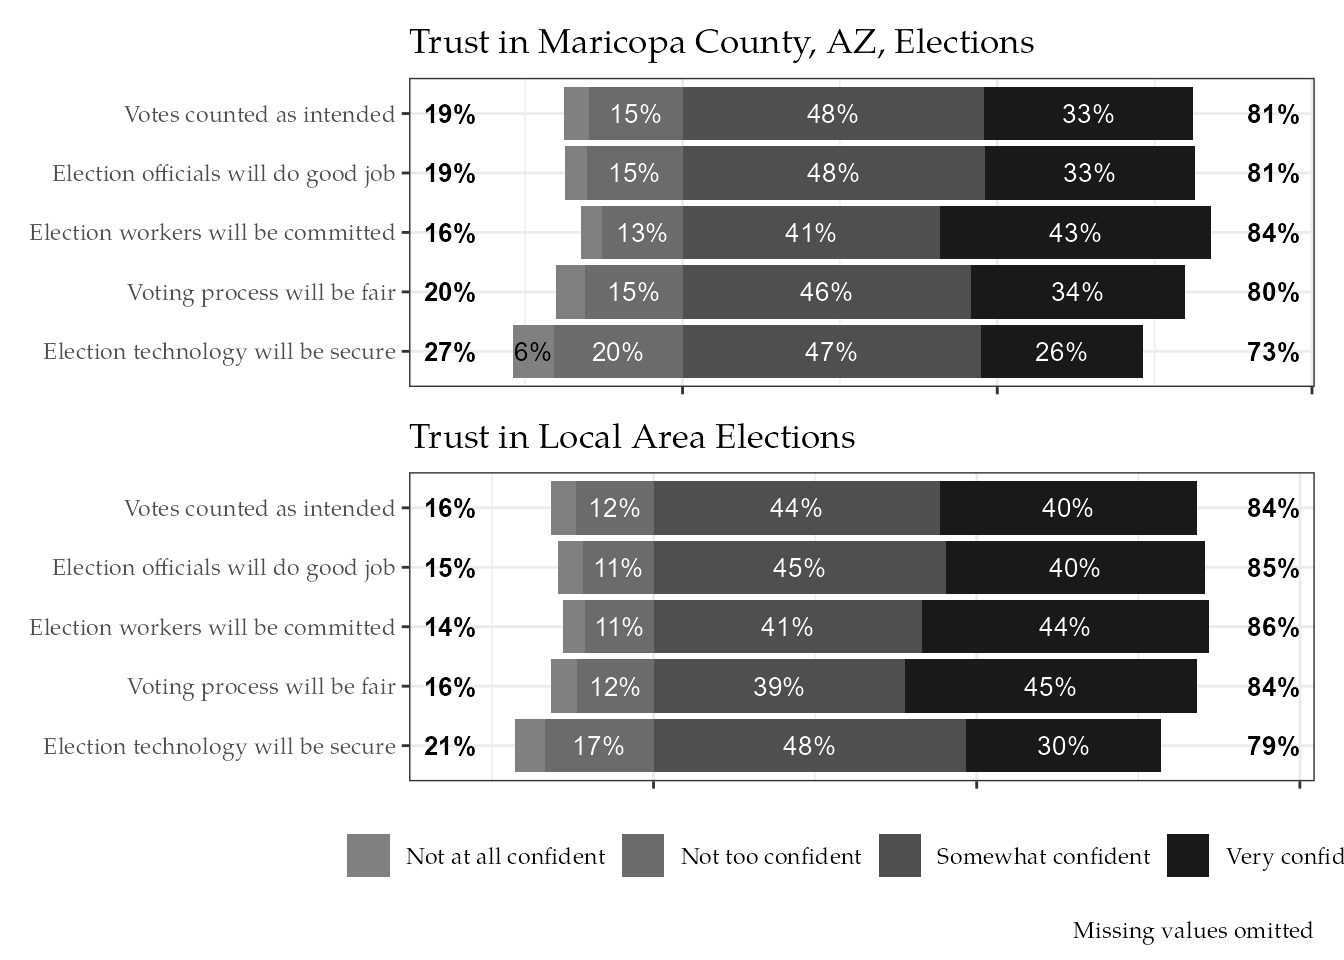

In [ ]:

# Instead of two separate plots, arrange into one plot while remaining separated
p1.trust <- trust.likertplot.az / trust.likertplot.lcl+
  patchwork::plot_annotation(caption = "Missing values omitted")+
  patchwork::plot_layout(guides = "collect") &
  theme(legend.position = "bottom")

p1.trust


## Distrust in elections across sample

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

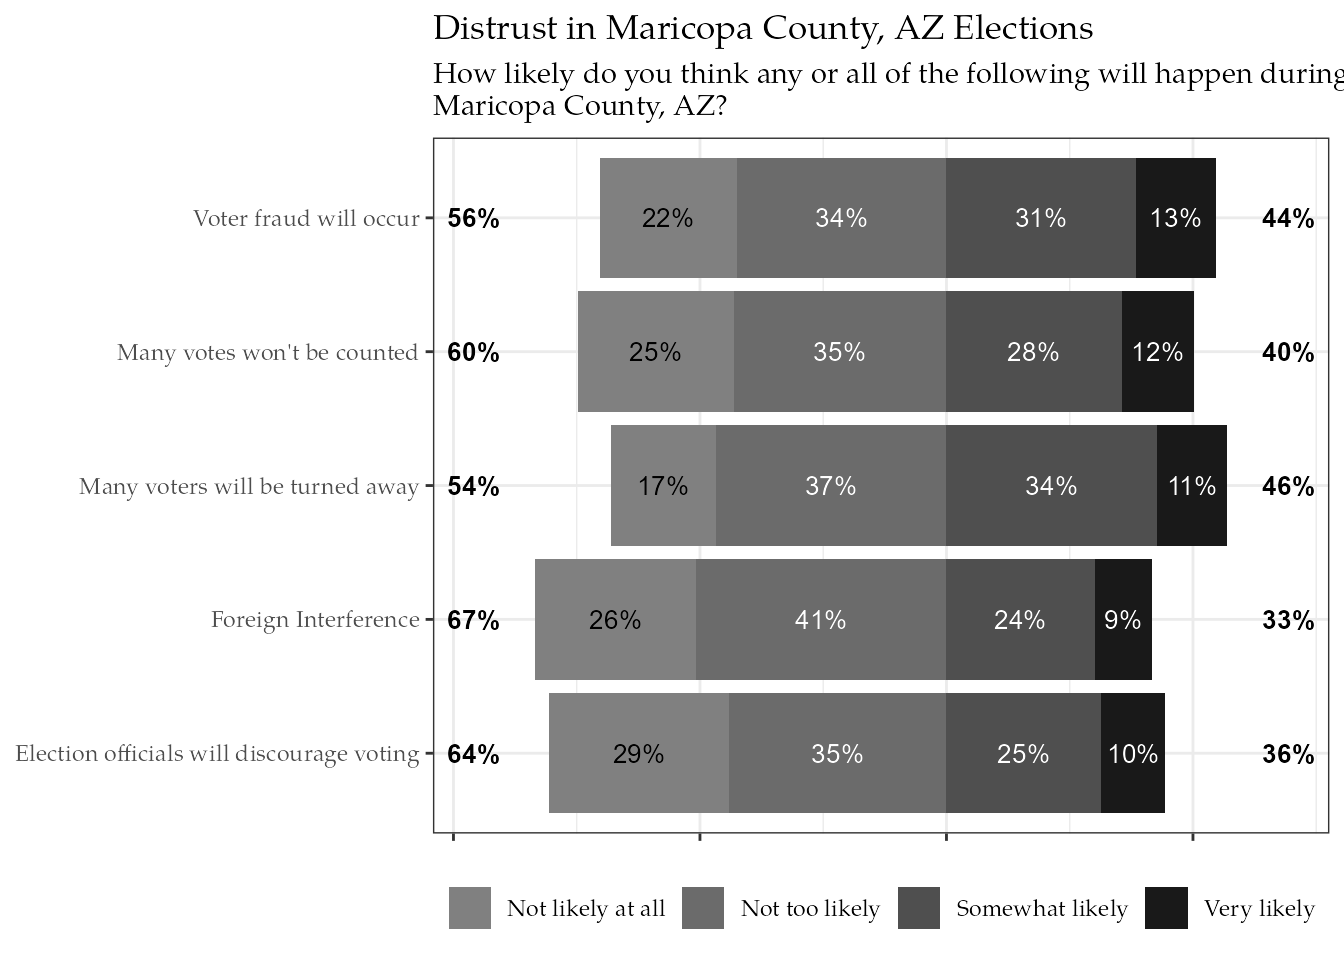

In [ ]:

# responses to distrust in AZ election items, overall sample
distrust.likert.az <- likert_plot(
  data, 
  x = all_of(distrust.az.items), 
  variable_labels = distrust.az.varlabels,
  title = "Distrust in Maricopa County, AZ Elections", 
  subtitle = str_wrap(
    "How likely do you think any or all of the following will happen during this year´s elections in Maricopa County, AZ?",width = 95))


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

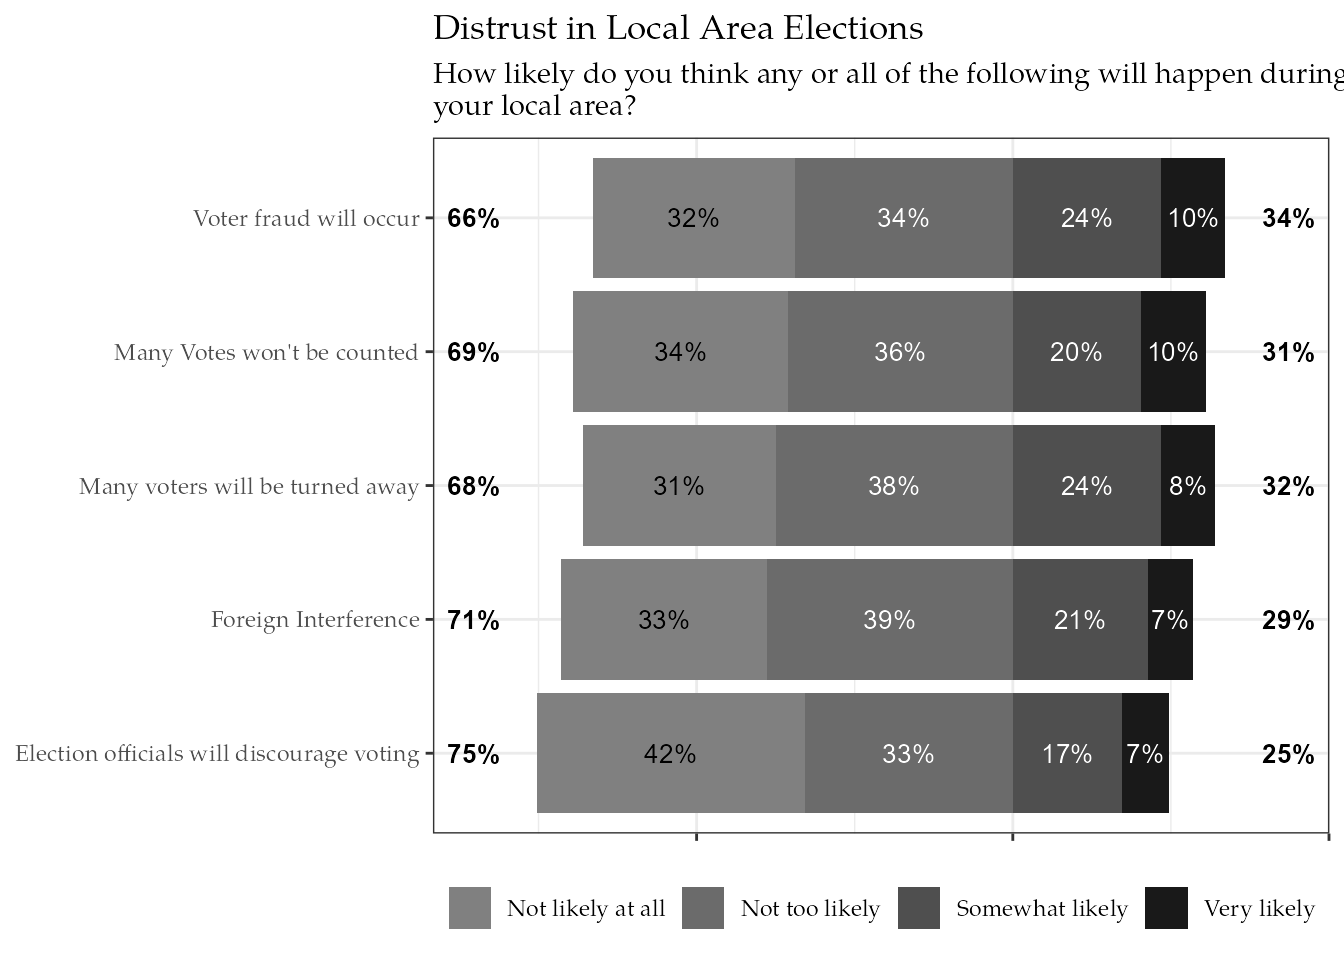

In [ ]:

# responses to distrust in local election items, overall sample
distrust.likert.lcl <- likert_plot(
  data,
  x = all_of(distrust.lcl.items),
  variable_labels = distrust.lcl.varlabels,
  title = "Distrust in Local Area Elections",
  subtitle = str_wrap(
    "How likely do you think any or all of the following will happen during this year´s elections in your local area?",
    width = 95
  )
)


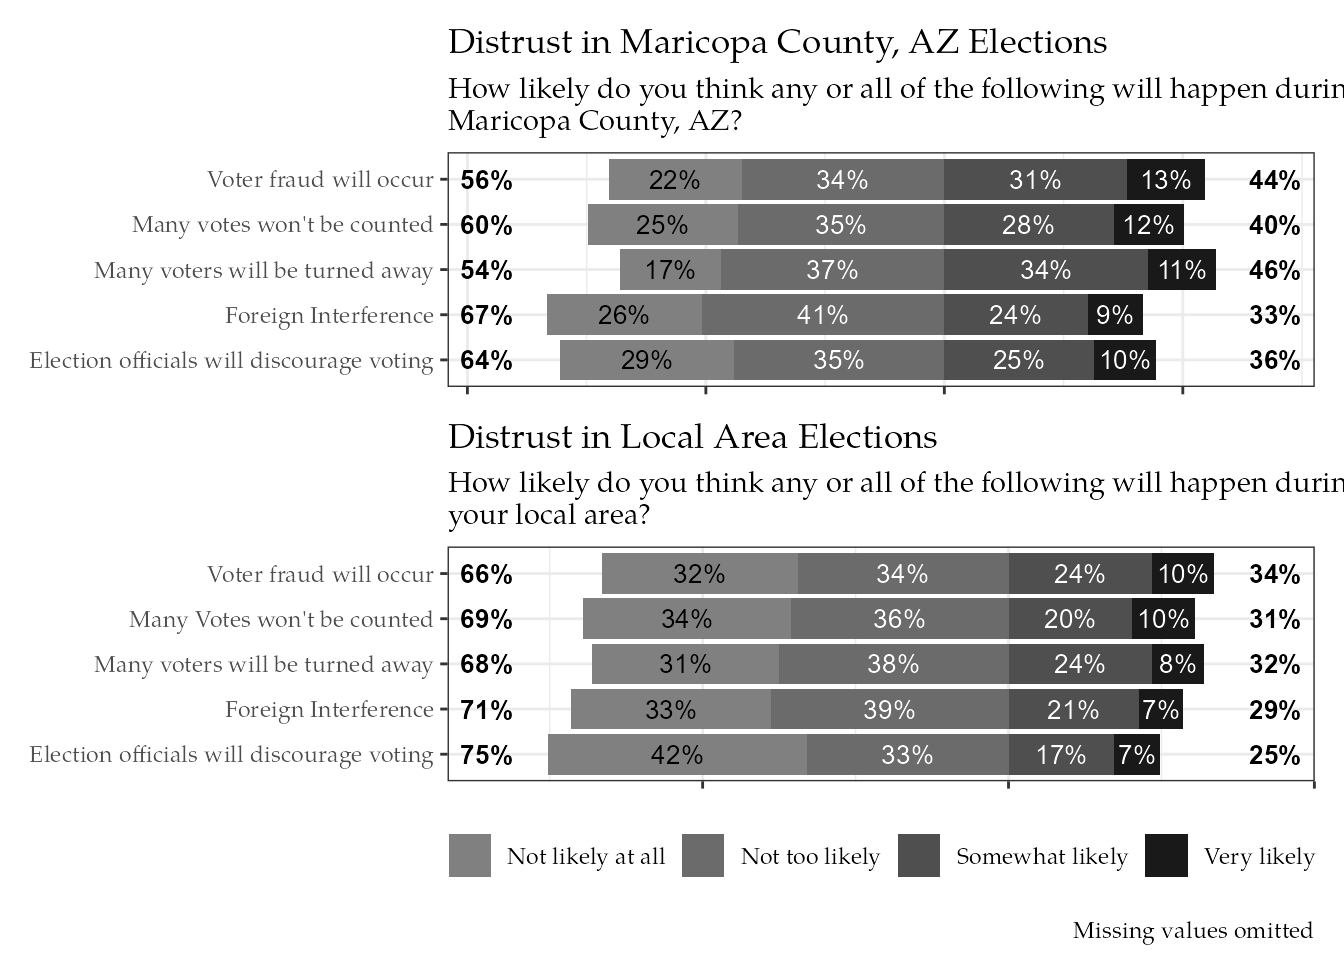

In [ ]:

p2.distrust <- distrust.likert.az/distrust.likert.lcl+
  patchwork::plot_annotation(caption = "Missing values omitted")+
  patchwork::plot_layout(guides = "collect") &
  theme(legend.position = "bottom")

p2.distrust


## Concerns for Violence and Confidence in Voter Safety Across Sample

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

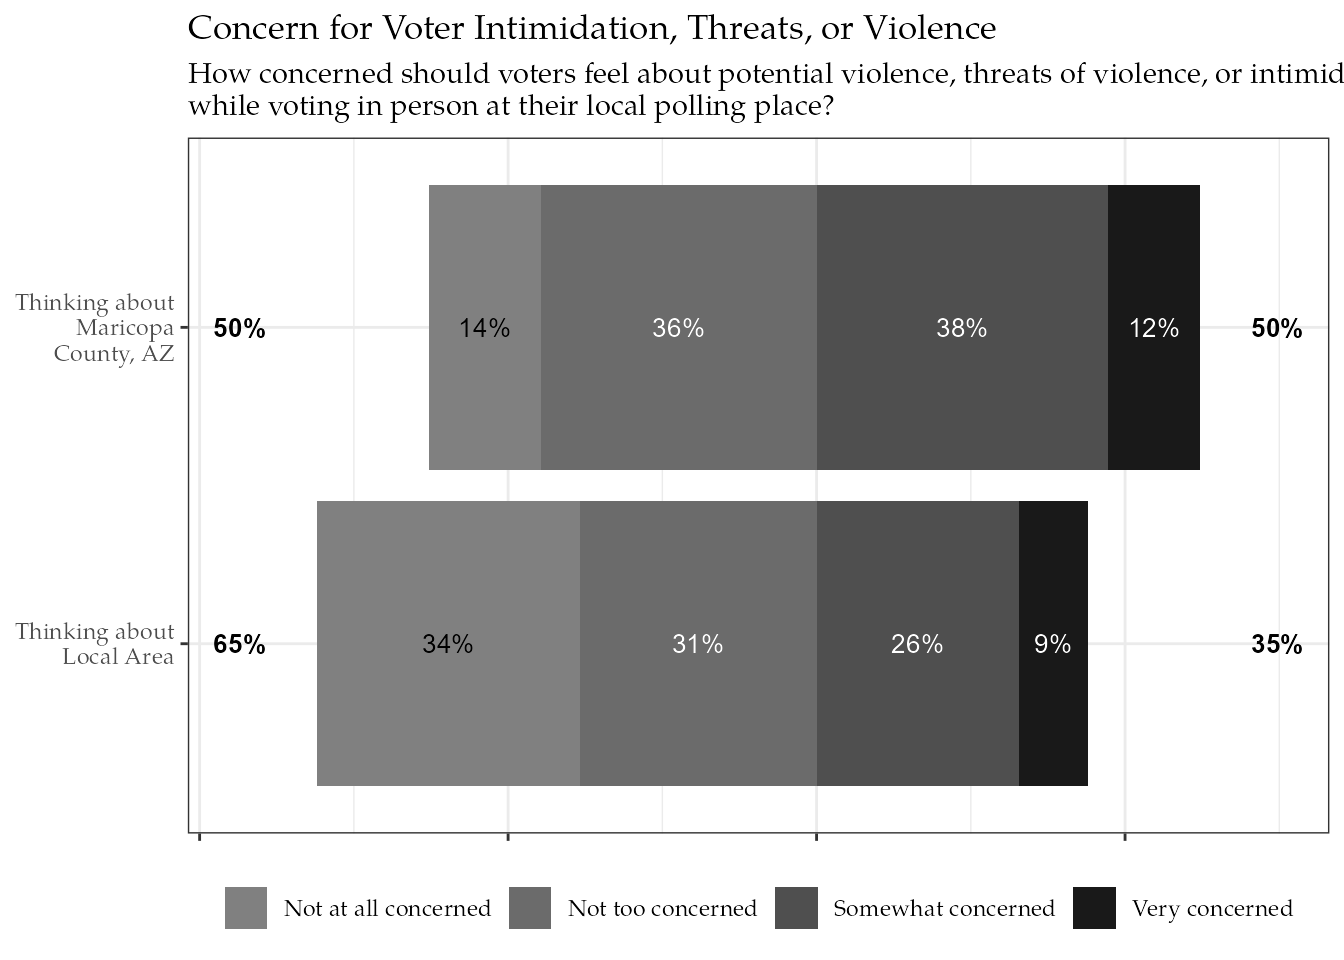

In [ ]:

# plot of safety concerns and confidence :::::::::::::::::::::::::::: 

safety.concerns.likert <- likert_plot(
  data, x = c(q25, q36), 
  y_label_wrap = 15, 
  variable_labels = c(
    q25 = 'Thinking about Maricopa County, AZ',
    q36 = "Thinking about Local Area"), 
  title = "Concern for Voter Intimidation, Threats, or Violence",
  subtitle = str_wrap(
    "How concerned should voters feel about potential violence, threats of violence, or intimidation while voting in person at their local polling place?", width = 99))


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

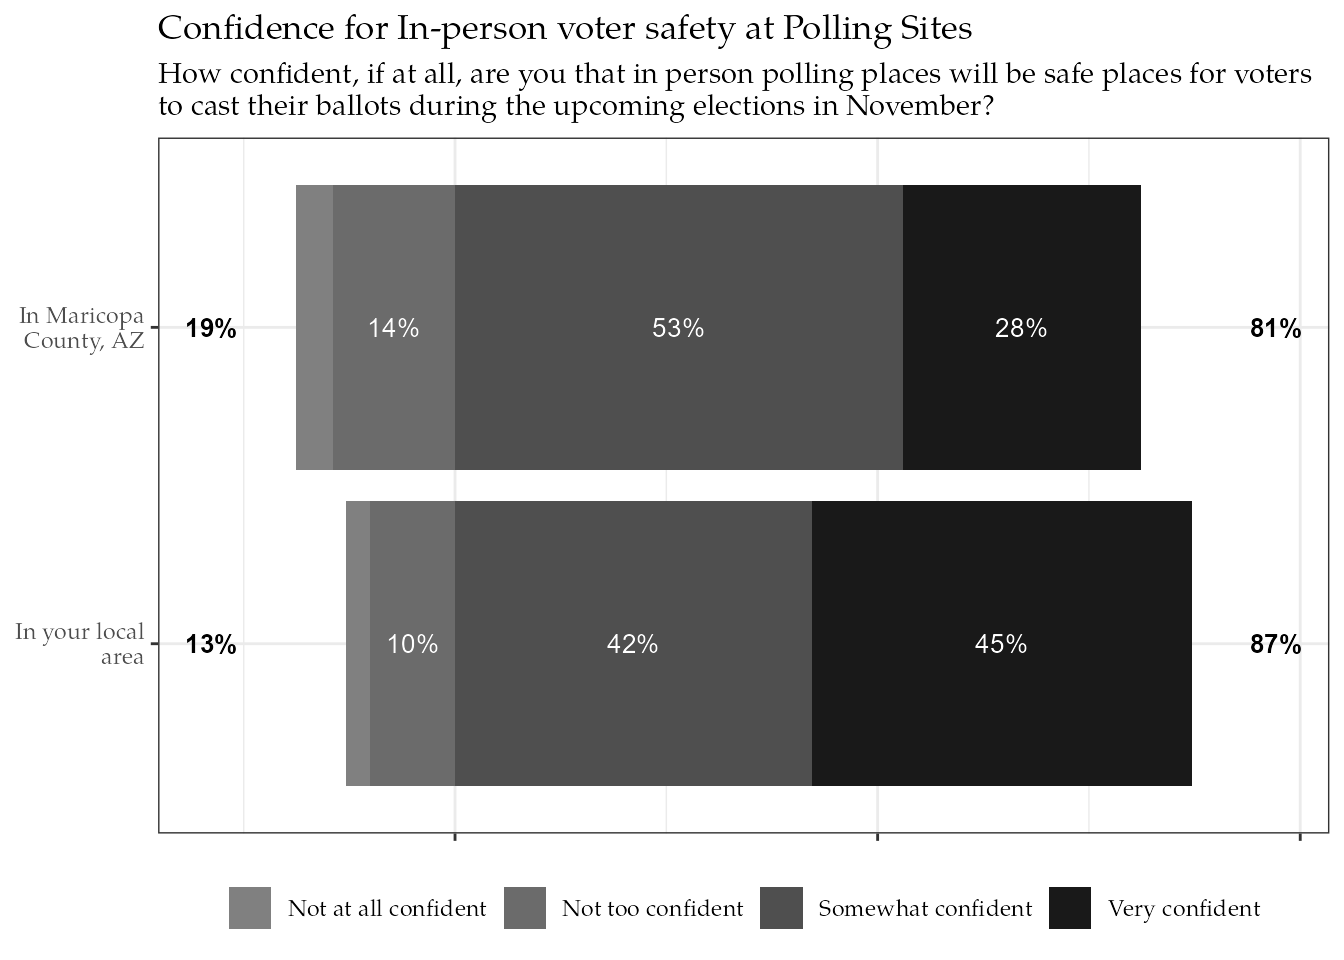

In [ ]:

# q26 In-person voter safety at polling sites
safety.conf.likert <- likert_plot(
  data,
  x = c(q26, q37),
  y_label_wrap = 15,
  variable_labels = c(q26 = "In Maricopa County, AZ", q37 = "In your local area"),
  title = str_wrap("Confidence for In-person voter safety at Polling Sites", width = 95),
  subtitle = str_wrap(
    "How confident, if at all, are you that in person polling places will be safe places for voters to cast their ballots during the upcoming elections in November?",
    width = 95
  )
)


In [ ]:

p3.safety <- safety.concerns.likert/safety.conf.likert+
  patchwork::plot_annotation(caption = "Missing values omitted")+
  patchwork::plot_layout(guides = "keep") &
  theme(legend.position = "bottom")


## Trust and Distrust by Education, Gender, and Partisanship

In [ ]:

# plots of trust in AZ elections by educational attainment :::::::::: 
trust.az.educ.likert <- data |>   
  filter(!is.na(educ_4cat)) |> 
  mutate(
    educ_3cat = pewmethods::fct_case_when(
      educ_4cat %in% c("H.S. or less") ~ "H.S. or less",
      educ_4cat %in% c("Some college no degree") ~ "Some college no Degree",
      educ_4cat %in% c("Postgraduate degree", "College degree") ~ "College Graduate")
    ) |>  
  likert_plot(x = all_of(trust.az.items), y = 'educ_3cat', facet_rows = vars(.question),
              facet_label_wrap = 15,
              variable_labels = trust.az.varlabels,
              subtitle = "Maricopa County, AZ")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plots of trust in Local area elections by educational attainment :: 
trust.lcl.educ.likert <- data |>  
  filter(!is.na(educ_4cat)) |>  
  mutate(
    educ_3cat = pewmethods::fct_case_when(
      educ_4cat %in% c("H.S. or less") ~ "H.S. or less",
      educ_4cat %in% c("Some college no degree") ~ "Some college no Degree",
      educ_4cat %in% c("Postgraduate degree", "College degree") ~ "College Graduate")
    ) |>  
  likert_plot(
    x = all_of(trust.lcl.items), y = 'educ_3cat', facet_rows = vars(.question),
    facet_label_wrap = 15, variable_labels = trust.lcl.varlabels,
    subtitle = "Local Area"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

p4.trust.az.educ <- trust.az.educ.likert + trust.lcl.educ.likert + 
    patchwork::plot_layout(guides = "collect") &
    theme(legend.position = "bottom")


In [ ]:

# plot of distrust in AZ elections by educational attainment :::::::: 
distrust.az.educ.likert <- data |> 
  filter(!is.na(educ_4cat)) |> 
  mutate(
    educ_3cat = pewmethods::fct_case_when(
      educ_4cat %in% c("H.S. or less") ~ "H.S. or less",
      educ_4cat %in% c("Some college no degree") ~ "Some college no Degree",
      educ_4cat %in% c("Postgraduate degree", "College degree") ~ "College Graduate")
    ) |>  
  likert_plot(x = all_of(distrust.az.items), y = 'educ_3cat', facet_rows=vars(.question),
              facet_label_wrap = 15, variable_labels = distrust.az.varlabels,
              subtitle = "Maricopa County, AZ")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plot of distrust items by educational attainment
distrust.lcl.educ.likert <- data |> 
  filter(!is.na(educ_4cat)) |> 
  mutate(
    educ_3cat = pewmethods::fct_case_when(
      educ_4cat %in% c("H.S. or less") ~ "H.S. or less",
      educ_4cat %in% c("Some college no degree") ~ "Some college no Degree",
      educ_4cat %in% c("Postgraduate degree", "College degree") ~ "College Graduate")
    ) |>   
  likert_plot(
    x = all_of(distrust.lcl.items), y = 'educ_3cat', facet_rows = vars(.question),
    facet_label_wrap = 15, variable_labels = distrust.lcl.varlabels,
    subtitle = "Local Area"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

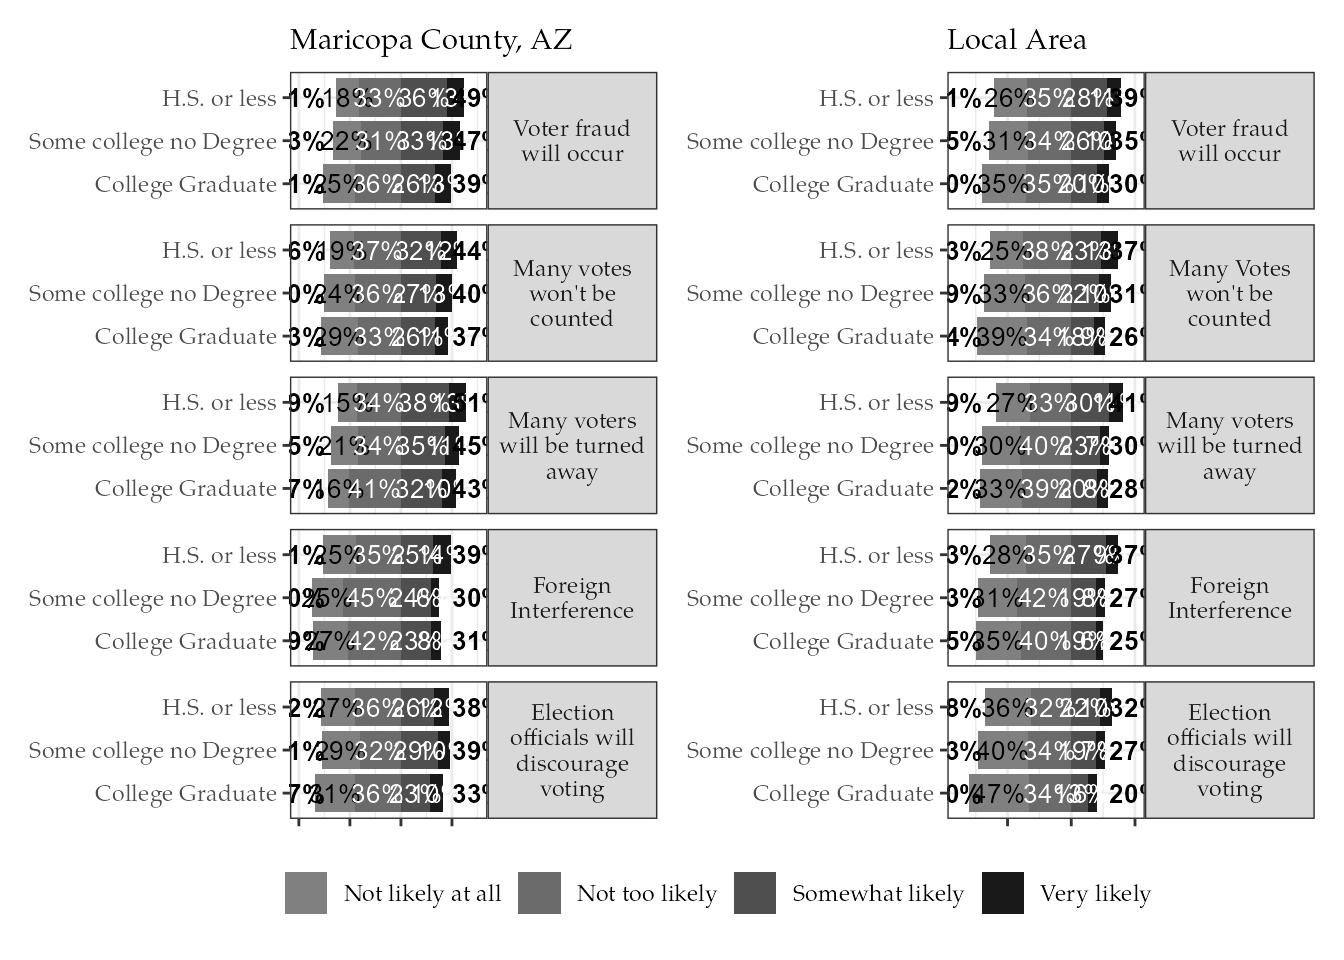

In [ ]:

p5.distrust.az.educ <- distrust.az.educ.likert + distrust.lcl.educ.likert +
    patchwork::plot_layout(guides = "collect") & 
    theme(legend.position = "bottom")


p5.distrust.az.educ


In [ ]:

# plots of trust and distrust in AZ elections by gender ::::::::::::: 
trust.az.gender.likert <- data |>  
  filter(!is.na(gender_3cat), gender_3cat != 'Other/Refused') |> 
  likert_plot(
    x = all_of(trust.az.items), y = 'gender_3cat', facet_rows = vars(.question),
    facet_label_wrap = 15, variable_labels = trust.az.varlabels,
    subtitle = "Maricopa County, AZ Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plots of distrust in AZ elections by gender ::::::::::::: 
distrust.az.gender.likert <- data |> 
  filter(!is.na(gender_3cat), gender_3cat != 'Other/Refused') |>
  likert_plot(
    x = all_of(distrust.az.items), y = 'gender_3cat', facet_rows = vars(.question),
    facet_label_wrap = 15, variable_labels = distrust.az.varlabels,
    subtitle = "Maricopa County, AZ Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

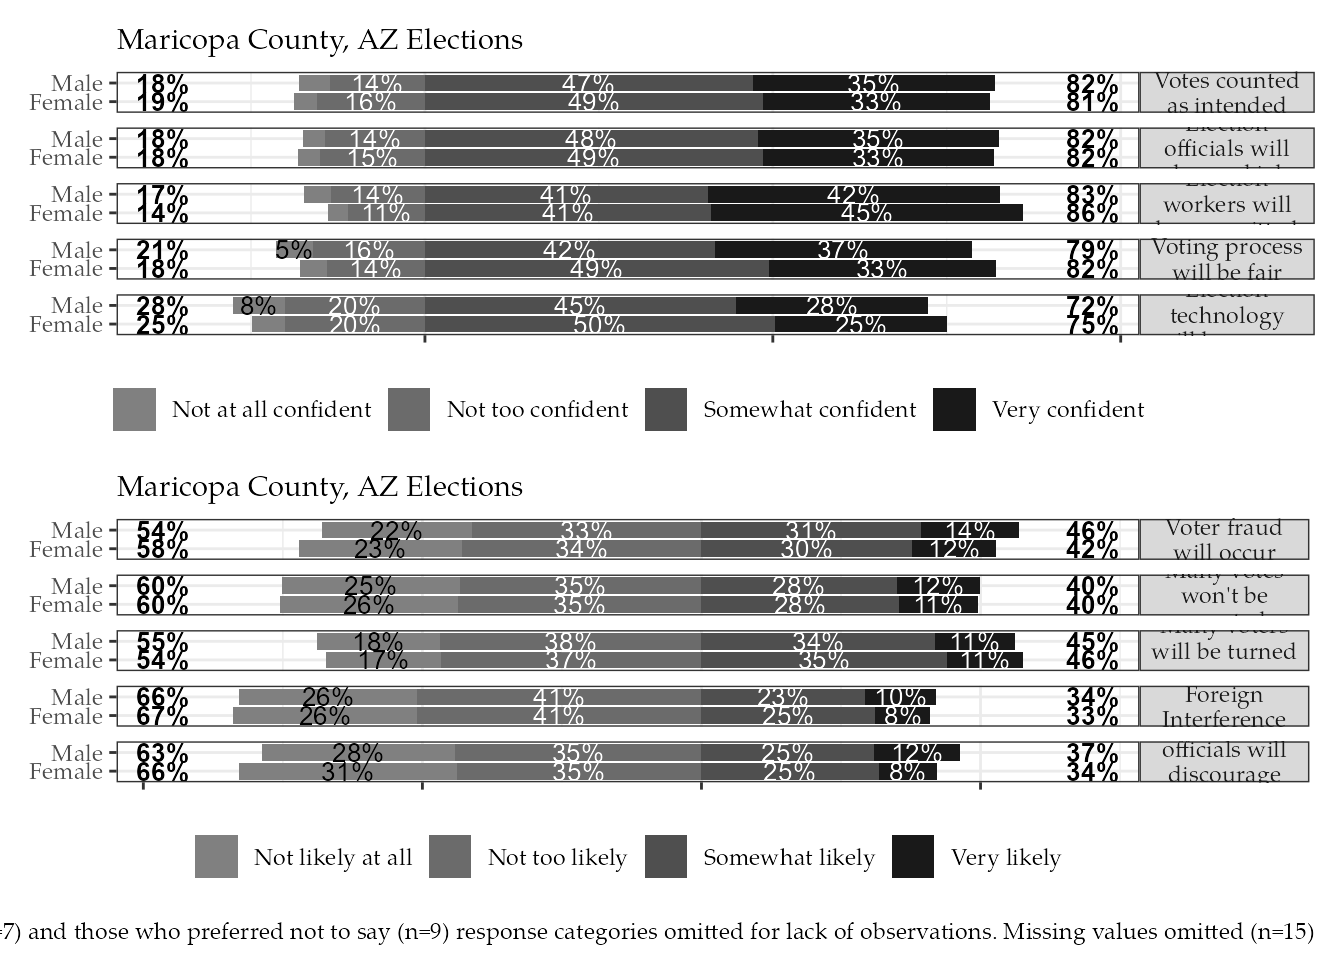

In [ ]:

p6.trust.az.gender <- trust.az.gender.likert / distrust.az.gender.likert +
  patchwork::plot_annotation(
    caption = str_wrap(
      "Gender Non-binary (n=7) and those who preferred not to say (n=9) response categories omitted for lack of observations. Missing values omitted (n=15)",
      width = 150
    ),
    theme = theme(text = element_text(family = "Palatino Linotype"))
  ) +
  patchwork::plot_layout(guides = 'keep') &
  theme(legend.position = "bottom")

p6.trust.az.gender


In [ ]:

# plot of trust in local area elections by gender
trust.lcl.gender.likert <- data |>  
  filter(!is.na(gender_3cat), gender_3cat != 'Other/Refused') |> 
  likert_plot(
    x = all_of(trust.lcl.items), y = 'gender_3cat',
    facet_rows = vars(.question),
    facet_label_wrap = 15, variable_labels = trust.lcl.varlabels,
    subtitle = "Local Area Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plot of distrust in local area elections by gender
distrust.lcl.gender.likert <- data |> 
  filter(!is.na(gender_3cat), gender_3cat != 'Other/Refused') |> 
  likert_plot(
    x = all_of(distrust.lcl.items), y = 'gender_3cat',
    facet_rows = vars(.question),
    facet_label_wrap = 15, variable_labels = distrust.lcl.varlabels,
    subtitle = "Local Area Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

p7.trust.lcl.gender <- trust.lcl.gender.likert/distrust.lcl.gender.likert+
  patchwork::plot_annotation(
    caption = str_wrap("Gender Non-binary (n=7) and those who preferred not to say (n=9) response categories omitted for lack of observations. Missing values omitted (n=15)",
                       width = 150), 
    theme = theme(text = element_text(family = "Palatino Linotype")))+
    patchwork::plot_layout(guides = 'keep') & 
    theme(legend.position = "bottom")


In [ ]:

# plot of trust in AZ elections by partisanship ::::::: 
trust.az.party.likert <- data |>  
  filter(!is.na(partyid_3cat)) |> 
  likert_plot(
    x = all_of(trust.az.items), y = 'partyid_3cat',
    facet_rows = vars(.question), 
    facet_label_wrap = 15,
    variable_labels = trust.az.varlabels,
    subtitle = "Maricopa County, AZ Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plot of distrust in AZ elections by partisanship ::::::: 
distrust.az.party.likert <- data |> 
  filter(!is.na(partyid_3cat)) |> 
  likert_plot(
    x = all_of(distrust.az.items), y = 'partyid_3cat',
    facet_rows = vars(.question), 
    facet_label_wrap = 15,
    variable_labels = distrust.az.varlabels,
    subtitle = "Maricopa County, AZ Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

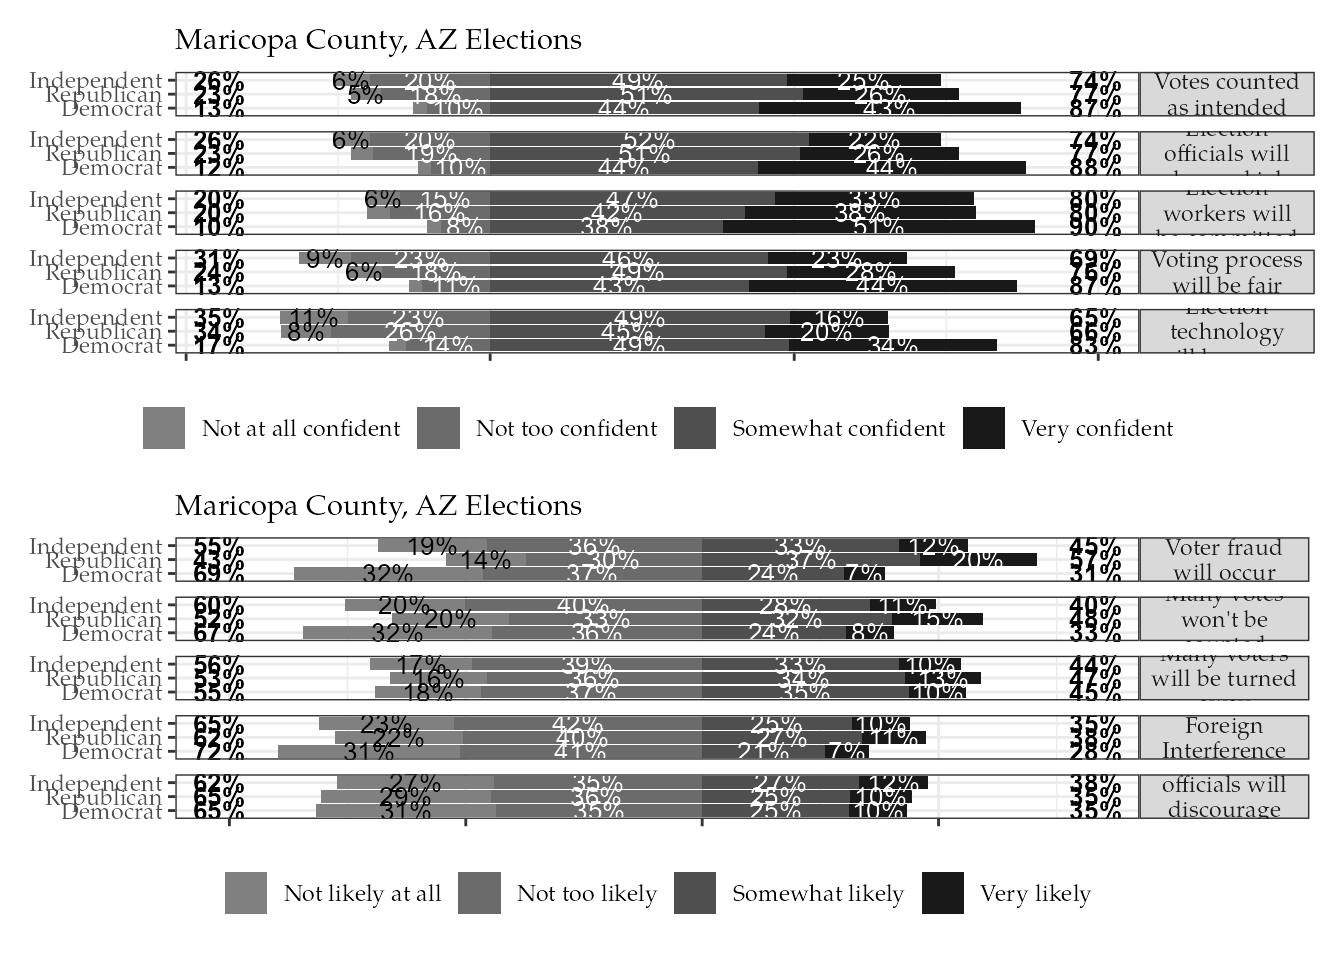

In [ ]:

p8.trust.az.party <- trust.az.party.likert/distrust.az.party.likert+
    patchwork::plot_layout(guides = 'keep') & 
    theme(legend.position = "bottom")

p8.trust.az.party


In [ ]:

# plot of trust and distrust in local area elections by partisanship  
trust.lcl.party.likert <- data |>  
  filter(!is.na(partyid_3cat)) |> 
  likert_plot(
    x = all_of(trust.lcl.items), y = 'partyid_3cat',
    facet_rows = vars(.question), 
    facet_label_wrap = 15,
    variable_labels = trust.lcl.varlabels,
    subtitle = "Local Area Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plot of distrust in local area elections by partisanship  
distrust.lcl.party.likert <- data |> 
  filter(!is.na(partyid_3cat)) |>  
  likert_plot(
    x = all_of(distrust.lcl.items), y = 'partyid_3cat',
    facet_rows = vars(.question), 
    facet_label_wrap = 15,
    variable_labels = distrust.lcl.varlabels,
    subtitle = "Local Area Elections"
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

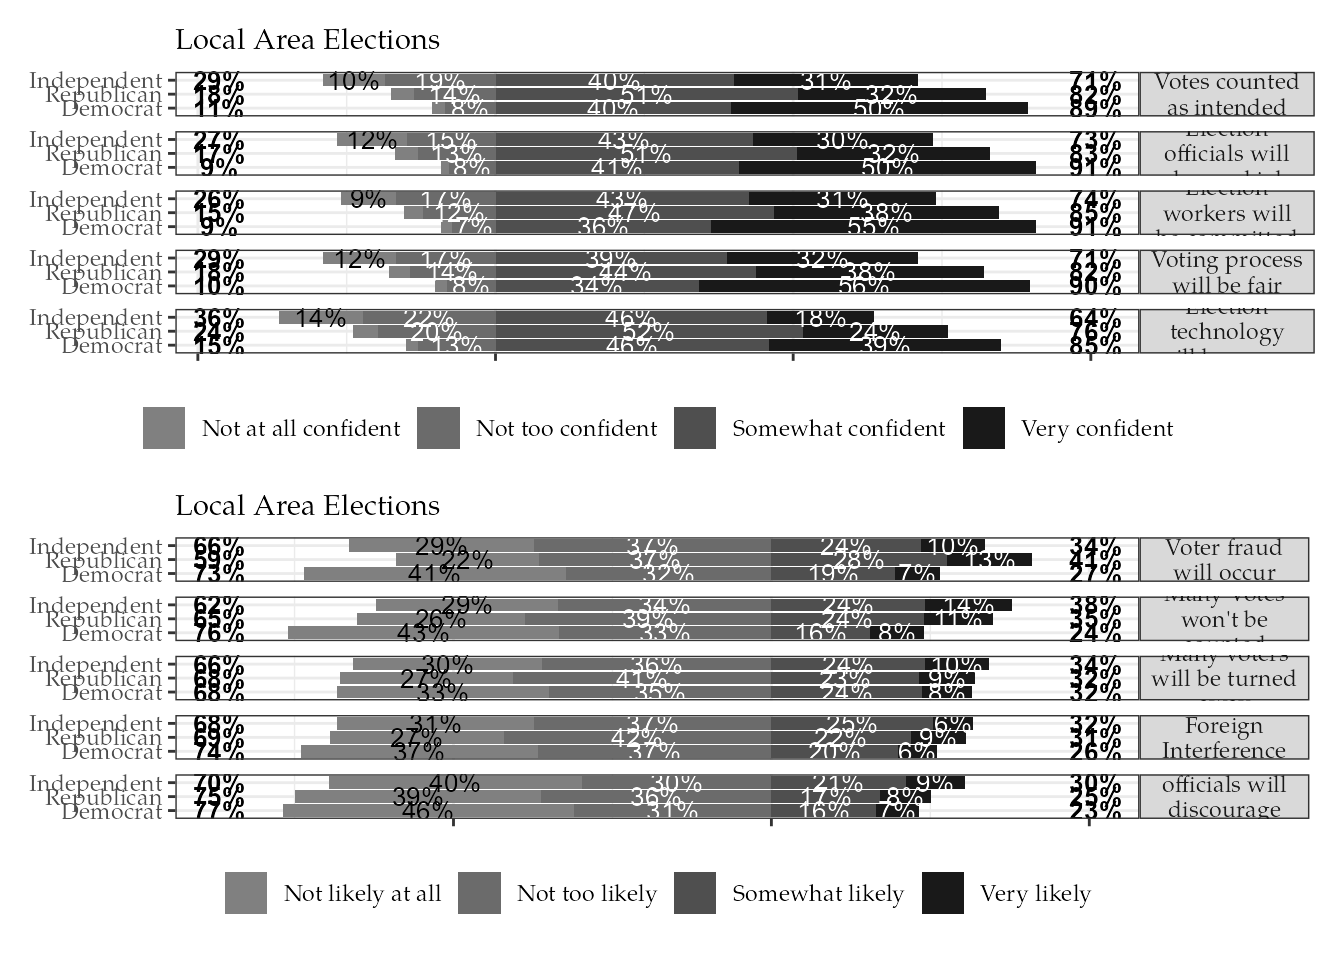

In [ ]:

p9.trust.lcl.party <- trust.lcl.party.likert/distrust.lcl.party.likert+
    patchwork::plot_layout(guides = 'keep') & 
    theme(legend.position = "bottom")

p9.trust.lcl.party


## Trust and Distrust by Treatment Condition

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

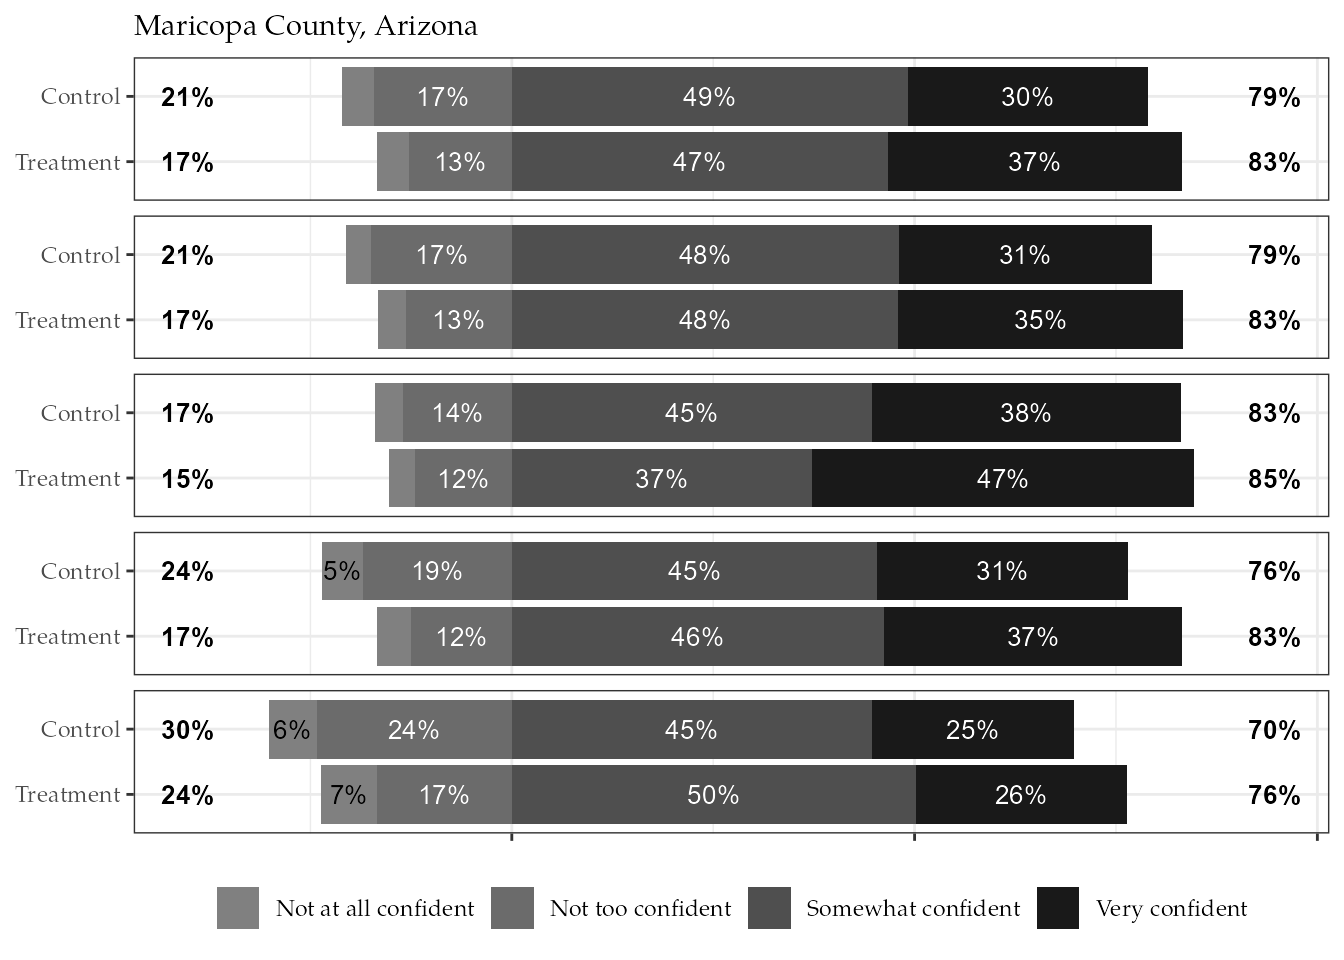

In [ ]:

# plot of trust in AZ elections by treatment condition
trust.likert.treat.az <- data |>
  likert_plot(x = all_of(trust.az.items), y = 'group', 
    facet_rows = vars(.question),
    subtitle = "Maricopa County, Arizona")+
  theme(strip.text.y.right = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

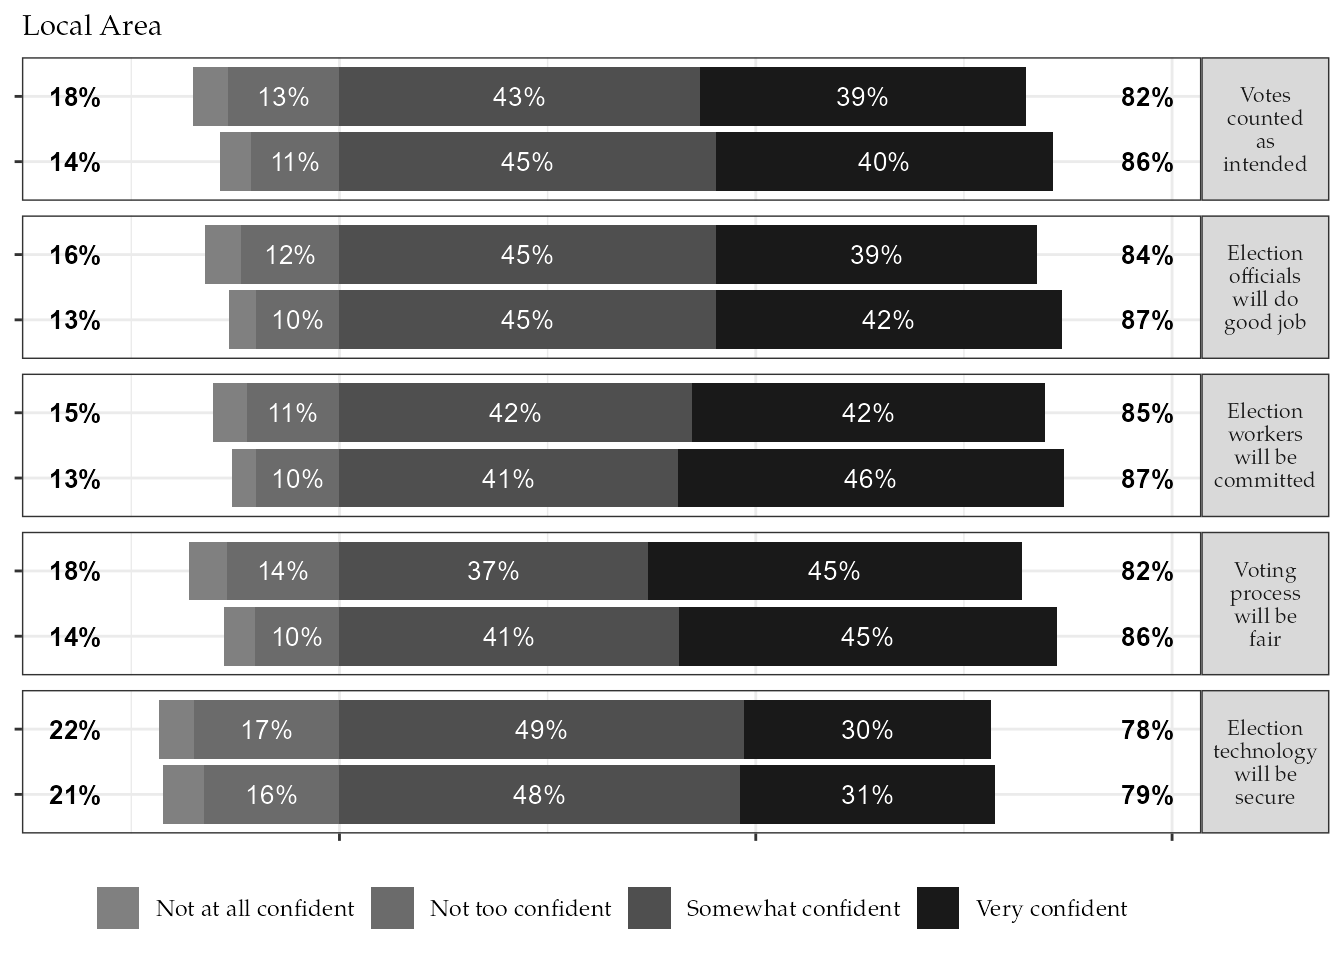

In [ ]:

# plot of trust in local elections by treatment condition
trust.likert.treat.lcl <- data |>
  likert_plot(x = all_of(trust.lcl.items), y = 'group', 
    facet_rows = vars(.question),
    facet_label_wrap = 10,
    variable_labels = trust.lcl.varlabels, 
    subtitle = "Local Area")+
  theme(strip.text.y.right = element_blank()) +
  theme(
    axis.text.y.left = element_blank(), # remove y-axis text on 2nd plot
    strip.text.y.right = element_text(angle = 0, size = 8)
  )


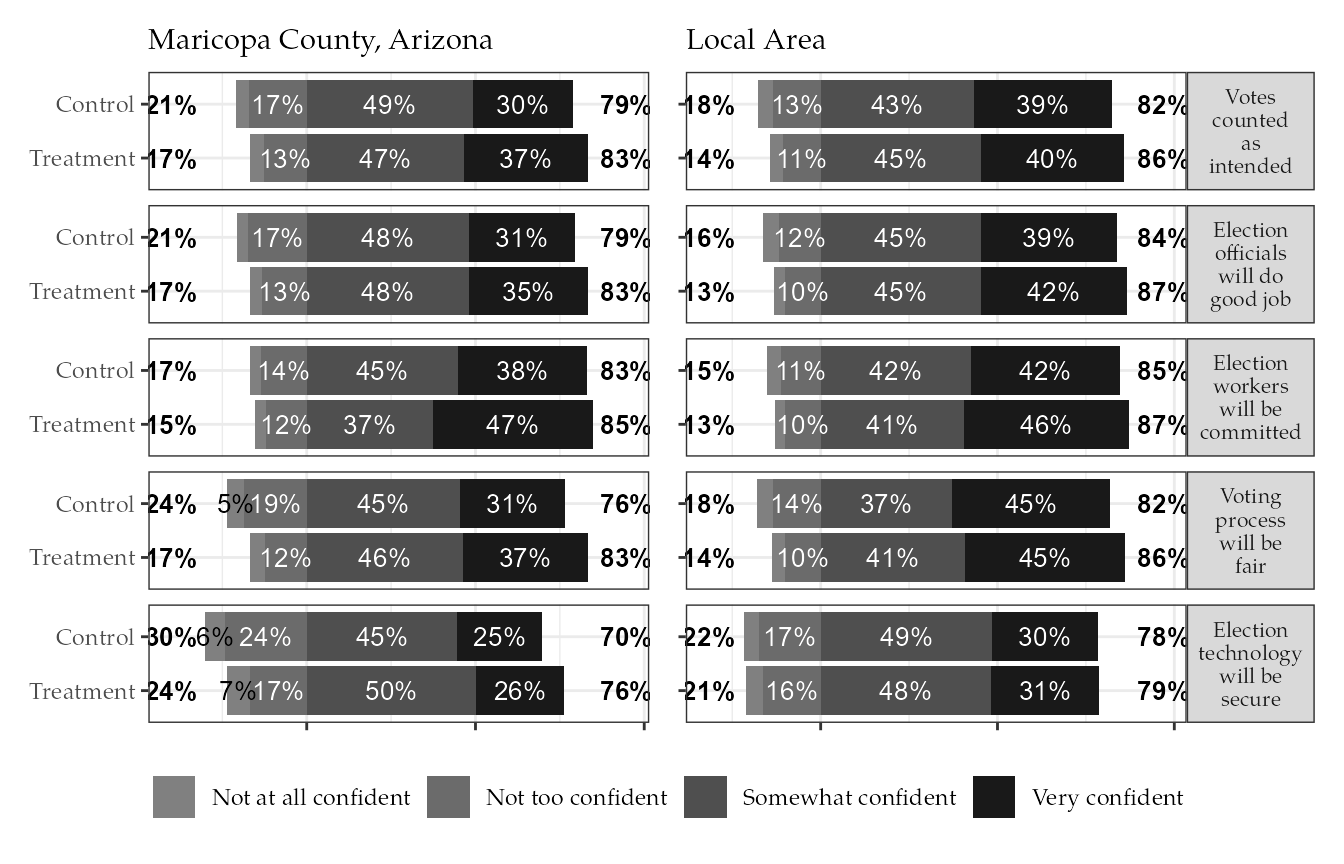

In [ ]:

p10.trust.treat <- trust.likert.treat.az + trust.likert.treat.lcl+
  patchwork::plot_layout(guides = "collect") &
  theme(legend.position = "bottom")

p10.trust.treat


In [ ]:

# distrust in AZ elections by experimental condition
distrust.az.treat.likert <- data |>
  likert_plot(x = all_of(distrust.az.items), y = 'group', 
    facet_rows = vars(.question),
    subtitle = "Maricopa County, AZ")+
  theme(strip.text.y.right = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# distrust in local area elections by treatment condition
distrust.lcl.treat.likert <- data |>
  likert_plot(x = all_of(distrust.lcl.items), y = 'group', 
    facet_rows = vars(.question),
    facet_label_wrap = 10,
    variable_labels = distrust.lcl.varlabels,
    subtitle = "Local Area")+
  theme(strip.text.y.right = element_blank()) +
  theme(
    axis.text.y.left = element_blank(), # remove y-axis text on 2nd plot
    strip.text.y.right = element_text(angle = 0, size = 8)
  )


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

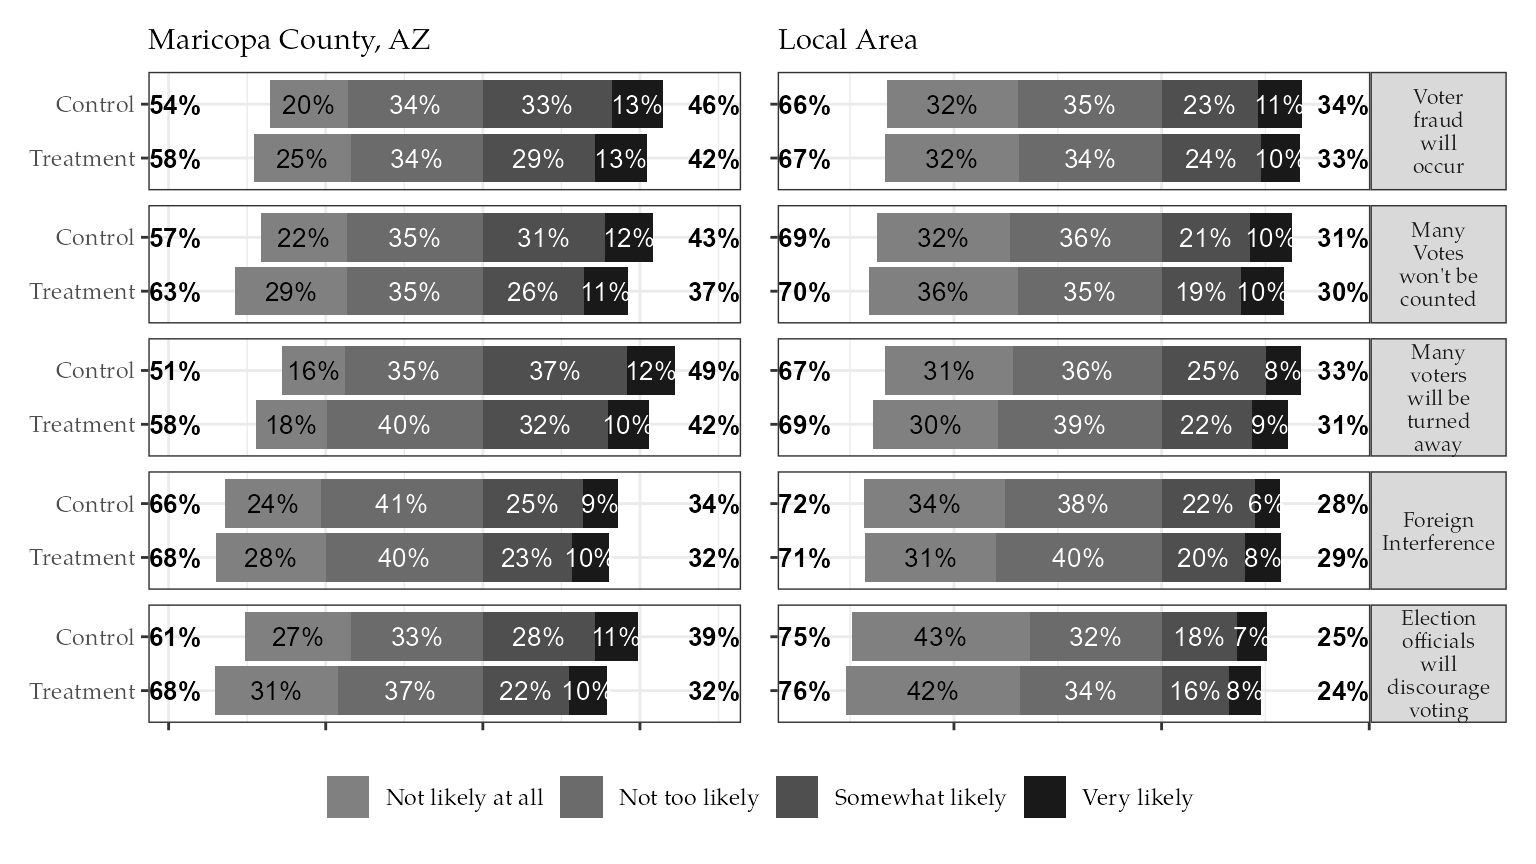

In [ ]:

p11.distrust.treat <- distrust.az.treat.likert + distrust.lcl.treat.likert+
  patchwork::plot_layout(guides = 'collect')

p11.distrust.treat


## trust and distrust by partisanship and treatment

In [ ]:

# plots of trust and distrust by partisanship and treatment ::::::::: 

# plot of trust in AZ elections by experiment condition and party id
trust.az.treat.partyid <- data |> 
  filter(!is.na(partyid_3cat)) |>
  likert_plot(
    x = all_of(trust.az.items),
    y = 'partyid_3cat',
    facet_rows = vars(.question),
    facet_cols = vars(group),
    facet_label_wrap = 15,
    variable_labels = trust.az.varlabels,
    title = "Trust in Maricopa County, AZ Elections by Treatment and Partisanship")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# plot of trust in local elections by experiment condition and party id
trust.lcl.treat.partyid <- data |> 
  filter(!is.na(partyid_3cat)) |>
  likert_plot(
    x = all_of(trust.lcl.items),
    y = 'partyid_3cat',
    facet_rows = vars(.question),
    facet_cols = vars(group),
    facet_label_wrap = 15,
    variable_labels = trust.lcl.varlabels,
    title = "Trust in Local Area Elections by Treatment and Partisanship")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

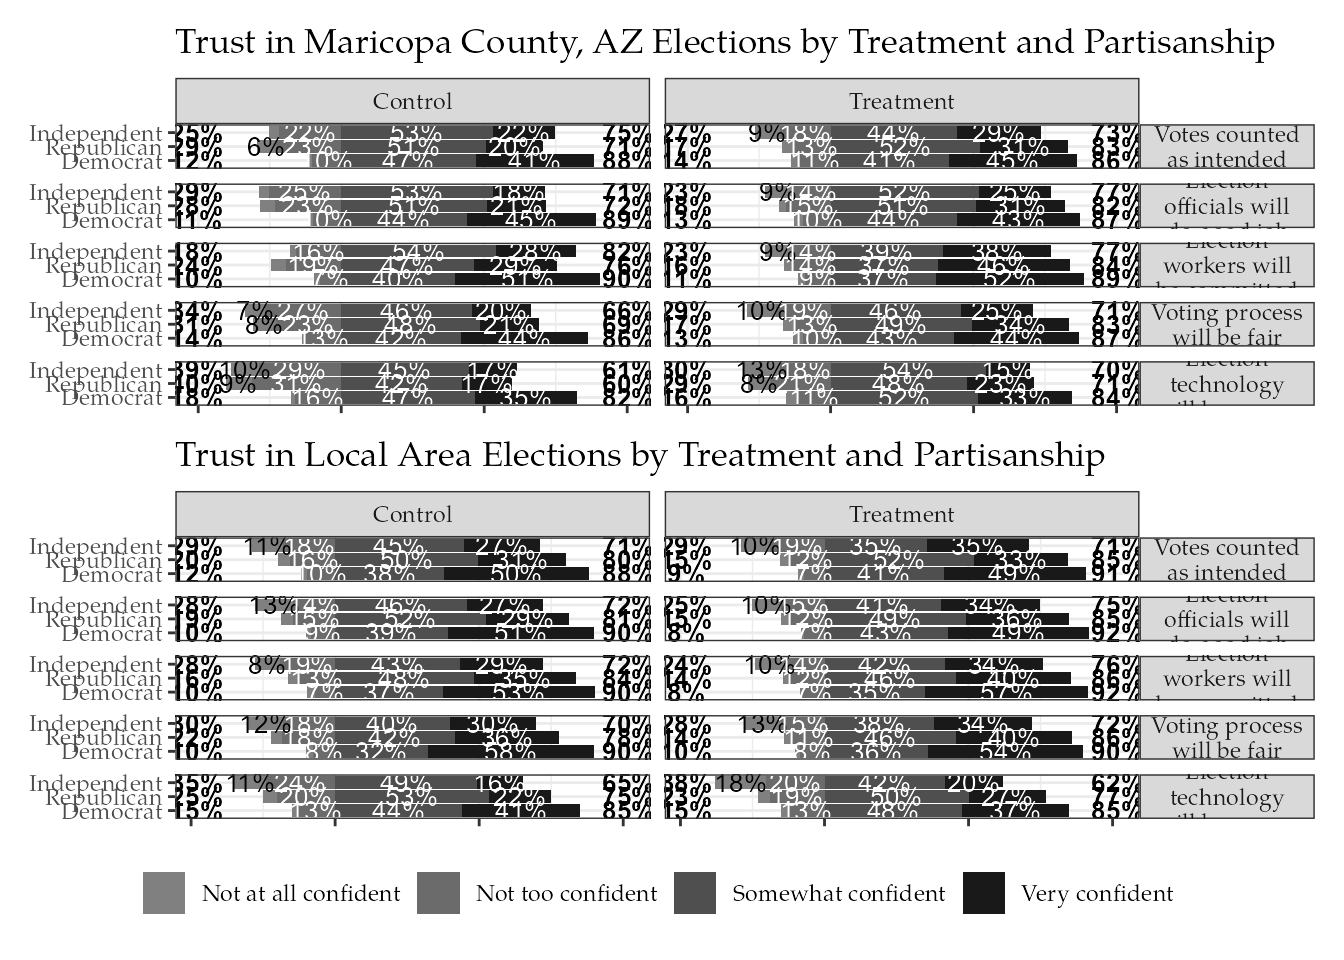

In [ ]:

p12.trust.treat.partyid <- trust.az.treat.partyid / trust.lcl.treat.partyid+
  patchwork::plot_layout(guides = 'collect')

p12.trust.treat.partyid


## Trust and Distrust by Legitimacy beliefs and Treatment Condition

In [ ]:

# plots of trust and distrust by legitimacy and treatment ::::::::::: 

# trust in AZ elections by experiment conditions among those who believe the 2020
# election results were illegitimate
trust.az.treat.legit <- data |> 
  filter(!is.na(partyid_3cat), !is.na(q7)) |>
  filter(q7 == "Not legitimate") |> 
  likert_plot(
    x = all_of(trust.az.items), 
    y = 'group',
    facet_rows = vars(.question),
    facet_cols = vars(q7),
    facet_label_wrap = 15,
    variable_labels = trust.az.varlabels,
    subtitle = str_wrap("Maricopa County, AZ",
      width = 95) 
  )+
  theme(text = element_text(family = 'TeX Gyre Pagella'),
        strip.text.y.right = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# trust in local elections by experiment conditions among those who believe the
# 2020 election results were illegitimate
trust.lcl.treat.legit <- data |> 
  filter(!is.na(partyid_3cat), !is.na(q7)) |>
  filter(q7 == "Not legitimate") |> 
  likert_plot(
    x = all_of(trust.lcl.items), 
    y = 'group',
    facet_rows = vars(.question),
    facet_cols = vars(q7),
    facet_label_wrap = 15,
    variable_labels = trust.lcl.varlabels,
    subtitle = str_wrap("Local Area",
      width = 95) 
  )+
  theme(
    text = element_text(family = 'TeX Gyre Pagella'),
    axis.text.y.left = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

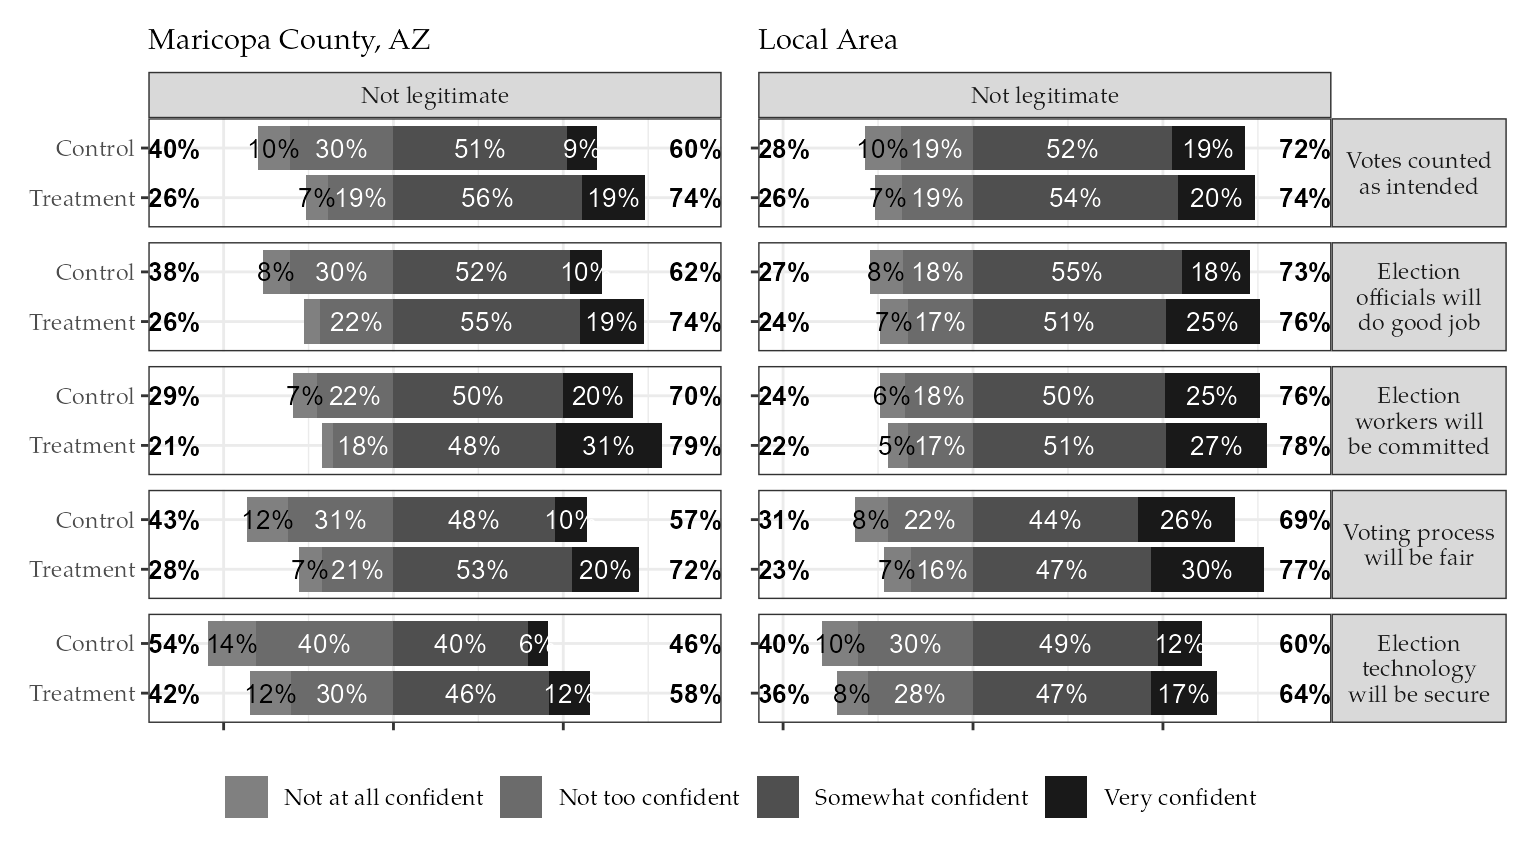

In [ ]:

p13.trust.treat.legit <- trust.az.treat.legit + trust.lcl.treat.legit+
  patchwork::plot_layout(guides = 'collect')

p13.trust.treat.legit


In [ ]:

# distrust in AZ elections by experiment conditions among those who believe the
# 2020 election results were illegitimate
distrust.az.treat.legit <- data |> 
  filter(!is.na(partyid_3cat), !is.na(q7)) |>
  filter(q7 == "Not legitimate") |> 
  likert_plot(
    x = all_of(distrust.az.items), 
    y = 'group',
    facet_rows = vars(.question),
    facet_cols = vars(q7),
    facet_label_wrap = 15,
    variable_labels = distrust.az.varlabels,
    subtitle = str_wrap("Maricopa County, AZ",
      width = 95) 
  )+
  theme(
    text = element_text(family = 'TeX Gyre Pagella'),
    strip.text.y.right = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# distrust in local elections by experiment conditions among those who believe
# the 2020 election results were illegitimate
distrust.lcl.treat.legit <- data |> 
  filter(!is.na(partyid_3cat), !is.na(q7)) |>
  filter(q7 == "Not legitimate") |> 
  likert_plot(
    x = all_of(distrust.lcl.items), 
    y = 'group',
    facet_rows = vars(.question),
    facet_cols = vars(q7),
    facet_label_wrap = 15,
    variable_labels = distrust.lcl.varlabels,
    subtitle = str_wrap("Local Area",
      width = 95) 
  )+
  theme(
    text = element_text(family = 'TeX Gyre Pagella'),
    axis.text.y.left = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

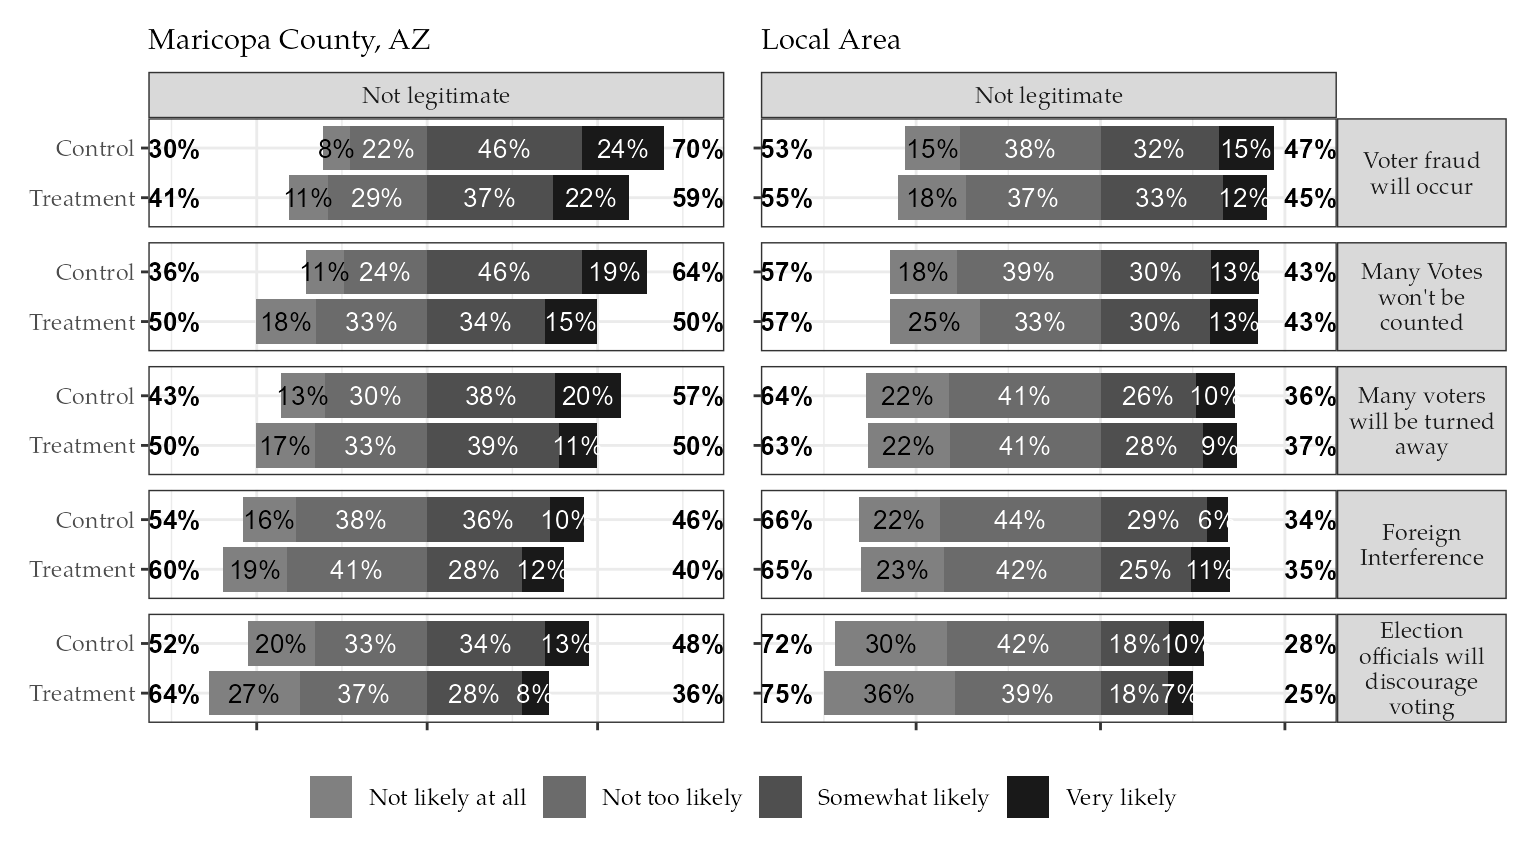

In [ ]:

p14.distrust.treat.legit <- distrust.az.treat.legit + distrust.lcl.treat.legit+
  patchwork::plot_layout(guides = 'collect')

p14.distrust.treat.legit


## Concerns for Violence and Confidence in Voter Safety by Treatment

In [ ]:

# plot for safety concerns by treatment ::::::::::::::::::::::::::::: 

# Because q25 measures levels of concern/worry, it cannot be included in the
# same Likert plot as q26 as that measures reported confidence that voters will
# be safe to vote in-person

# safety concerns by treatment
safety.concern.treat.likert <- data |>
  # Need to slightly modify text of factor levels
  mutate(across(
    c(q25, q36),
    ~ pewmethods::fct_case_when(
      .x == "Very concerned" ~ "Very concerned",
      .x == "Somewhat concerned" ~ "Somewhat concerned",
      .x %in% c("Not too concerned", "Somewhat unconcerned") ~ "Not too concerned",
      .x == "Not at all concerned" ~ "Not at all concerned",
      TRUE ~ NA
    )
  )) |>
  likert_plot(
    x = c(q25, q36),
    y = 'group',
    facet_rows = vars(.question),
    facet_label_wrap = 15,
    variable_labels = c(q25 = 'Thinking about Maricopa County, AZ', q36 = "Thinking about Local Area"),
    subtitle = str_wrap(
      "How concerned should voters feel about potential violence, threats of violence, or intimidation while voting in person at their local polling place?",
      width = 99
    )
  )+
  theme(
    text = element_text(family = 'TeX Gyre Pagella'), 
    axis.title.y.left = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:

# q26 In-person voter safety at election sites by treatment
safety.conf.treat.likert <- data |>
  likert_plot(
    x = c(q26, q37), 
    y = 'group',
    facet_label_wrap = 15,
    facet_rows = vars(.question),
    variable_labels = c(
      q26 = "In Maricopa County, AZ",
      q37 = "In your local area"
    ),
    subtitle = str_wrap("How confident, if at all, are you that in person polling places will be safe places for voters to cast their ballots during the upcoming elections in November?", width = 95)
  )+
  theme(
    text = element_text(family = 'TeX Gyre Pagella'), 
    axis.title.y.left = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

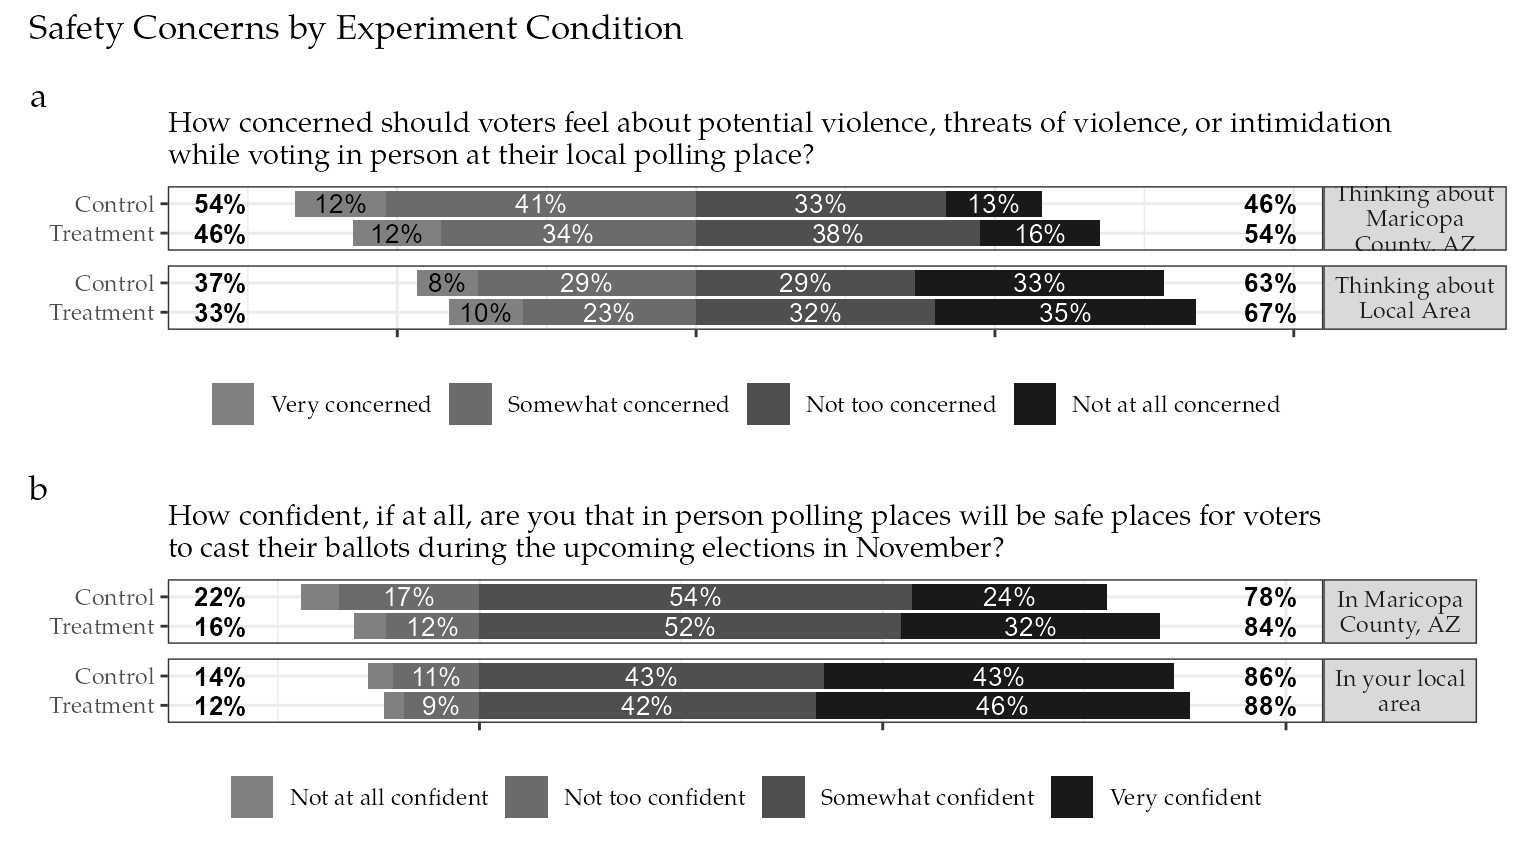

In [ ]:

p15.safety.treat <- safety.concern.treat.likert/safety.conf.treat.likert+
  patchwork::plot_layout(guides = "keep")+
  patchwork::plot_annotation(
    title = str_wrap("Safety Concerns by Experiment Condition", width = 80), 
    tag_levels = "a")

p15.safety.treat


An alternative

In [ ]:
#|   - "Confidence for In-person voter safety at Election Sites"
#|   - "Concern for Voter Intimidation, Threats, or Violence"

# safety concerns by treatment
safety.concern.treat.likert <- data |>
  # Need to slightly modify text of factor levels
  mutate(across(
    c(q25, q36),
    ~ pewmethods::fct_case_when(
      .x == "Very concerned" ~ "Very concerned",
      .x == "Somewhat concerned" ~ "Somewhat concerned",
      .x %in% c("Not too concerned", "Somewhat unconcerned") ~ "Not too concerned",
      .x == "Not at all concerned" ~ "Not at all concerned",
      TRUE ~ NA
    )
  )) |>
  likert_plot(
    x = c(q25, q36),
    y = 'group',
    facet_rows = vars(.question),
    facet_label_wrap = 15,
    variable_labels = c(q25 = 'Thinking about Maricopa County, AZ', q36 = "Thinking about Local Area"),
    subtitle = str_wrap(
      "How concerned should voters feel about potential violence, threats of violence, or intimidation while voting in person at their local polling place?",
      width = 99
    )
  )+
  theme(
    text = element_text(family = 'TeX Gyre Pagella'), 
    axis.title.y.left = element_blank())


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

## Distribution of Confidence in Elections

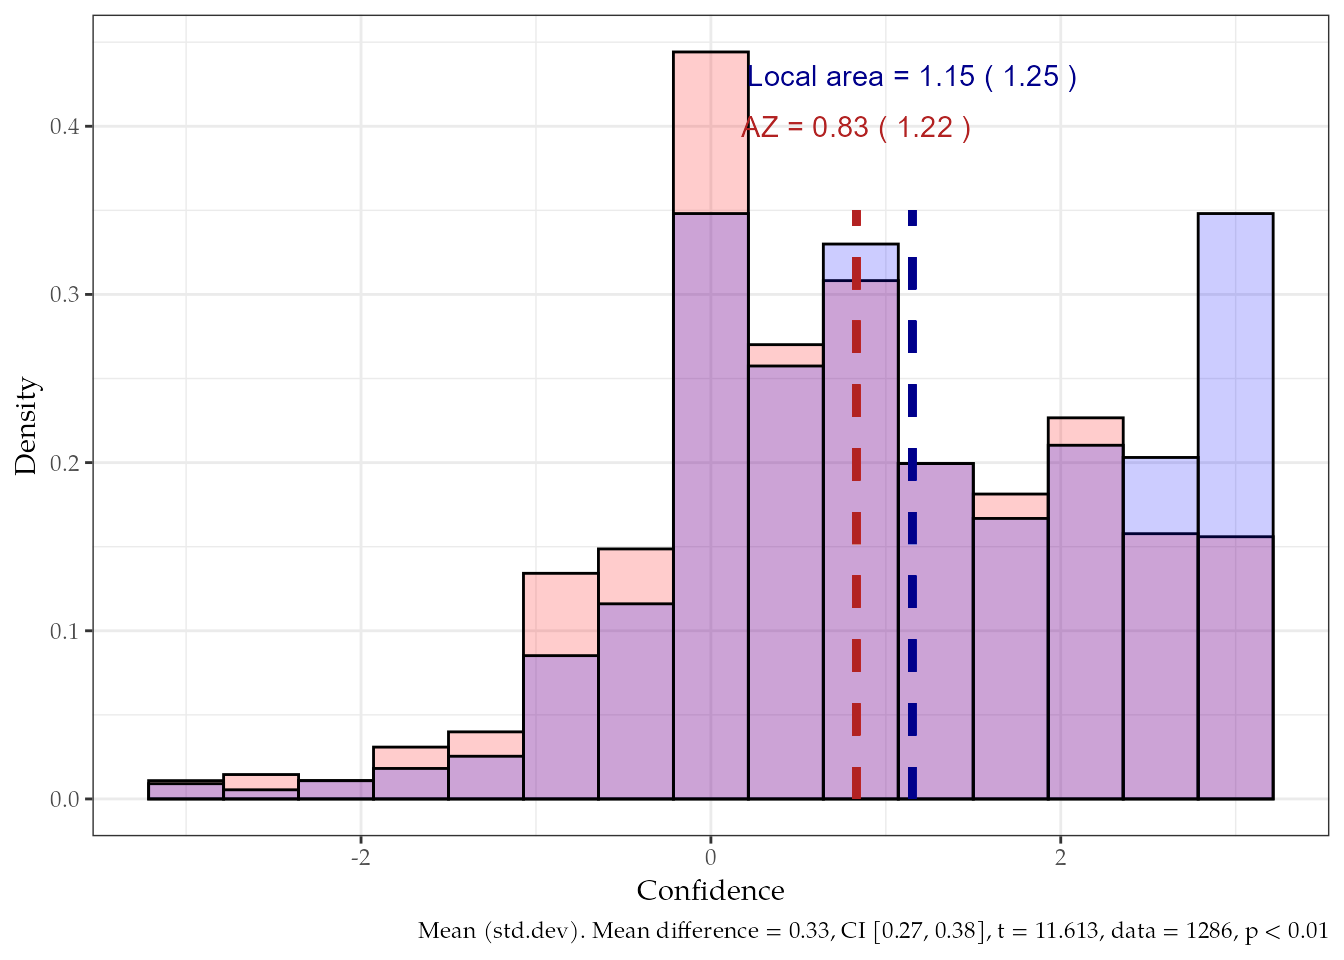

In [ ]:

ggplot(data) +
  geom_histogram(
    aes(x = conf.az.rescaled , y = after_stat(density)),
    bins = 15,
    alpha = 0.2,
    color = 1,
    fill = "red"
  ) +
  geom_histogram(
    aes(x = conf.lcl.rescaled , y = after_stat(density)),
    bins = 15,
    alpha = 0.2,
    color = 1,
    fill = "blue"
  ) +
  geom_segment(
    x = round(mean(data$conf.az.rescaled), 2),
    y = 0,
    yend = 0.35,
    color = "firebrick",
    lwd = 1.4,
    linetype = 2
  ) +
  geom_segment(
    x = round(mean(data$conf.lcl.rescaled), 2),
    y = 0,
    yend = 0.35,
    color = "darkblue",
    lwd = 1.4,
    linetype = 2
  ) +
  annotate(
    "text",
    x = round(mean(data$conf.az.rescaled), 2),
    y = 0.40,
    label = paste("AZ =", round(mean(
      data$conf.az.rescaled
    ), 2), "(", round(sd(
      data$conf.az.rescaled
    ), 2), ")"),
    color = "firebrick"
  ) +
  annotate(
    "text",
    x = round(mean(data$conf.lcl.rescaled), 2),
    y = 0.43,
    label = paste("Local area =", round(mean(
      data$conf.lcl.rescaled
    ), 2), "(", round(sd(
      data$conf.lcl.rescaled
    ), 2), ")"),
    color = "darkblue"
  ) +
  labs(
    x = str_wrap("Confidence", width = 85),
    y = "Density",
    caption = str_wrap(
     "Mean (std.dev). Mean difference = 0.33, CI [0.27, 0.38], t = 11.613, data = 1286, p < 0.01",
     width = 95)) +
  theme_bw(base_family = "TeX Gyre Pagella")


## Coefficient Plot of Treatment on Confidence by Location

In [ ]:
#|   - "Confidence by Treatment Condition"
#|   - "Trust and Distrust by Treatment Condition"

# coef plot of treatment effect on confidence distinguished by location
conf.coef1 <- jtools::plot_summs(
  lm(conf.az.rescaled ~ group, data = data), 
  lm(conf.lcl.rescaled ~ group, data = data), 
  center = T, scale = T, transform.response = T,
  model.names = c("Conf.AZ", "Conf.Local"),
  coefs = c("Treatment" = "groupTreatment"), 
  colors = c("red", "black"),
  point.shape = c(8, 1))+
  ggplot2::expand_limits(x = c(-0.25, 0.25))+
  labs(y = "")+
  theme_bw(base_family = "TeX Gyre Pagella")


# Coef plots of trust and distrust models for AZ and Local items
conf.coef2 <- jtools::plot_summs(
  lm(trust.scores.az ~ group, data = data),
  lm(distrust.scores.az ~ group, data = data),
  lm(trust.scores.lcl ~ group, data = data),
  lm(distrust.scores.lcl ~ group, data = data),
  center = T, scale = T, transform.response = T,
  model.names = c("Trust.AZ", "Distrust.AZ", "Trust.Local", "Distrust.Local"),
  coefs = c("Treatment" = "groupTreatment"),
  colors = c("red", "red", "black", "black"),
  point.shape = c(8, 8, 1, 1)
)+
  ggplot2::expand_limits(x = c(-0.25, 0.25))+
  labs(y = "")+
  theme_bw(base_family = "TeX Gyre Pagella")


conf.coef1
conf.coef2


## Polychoric Item Correlation Plot

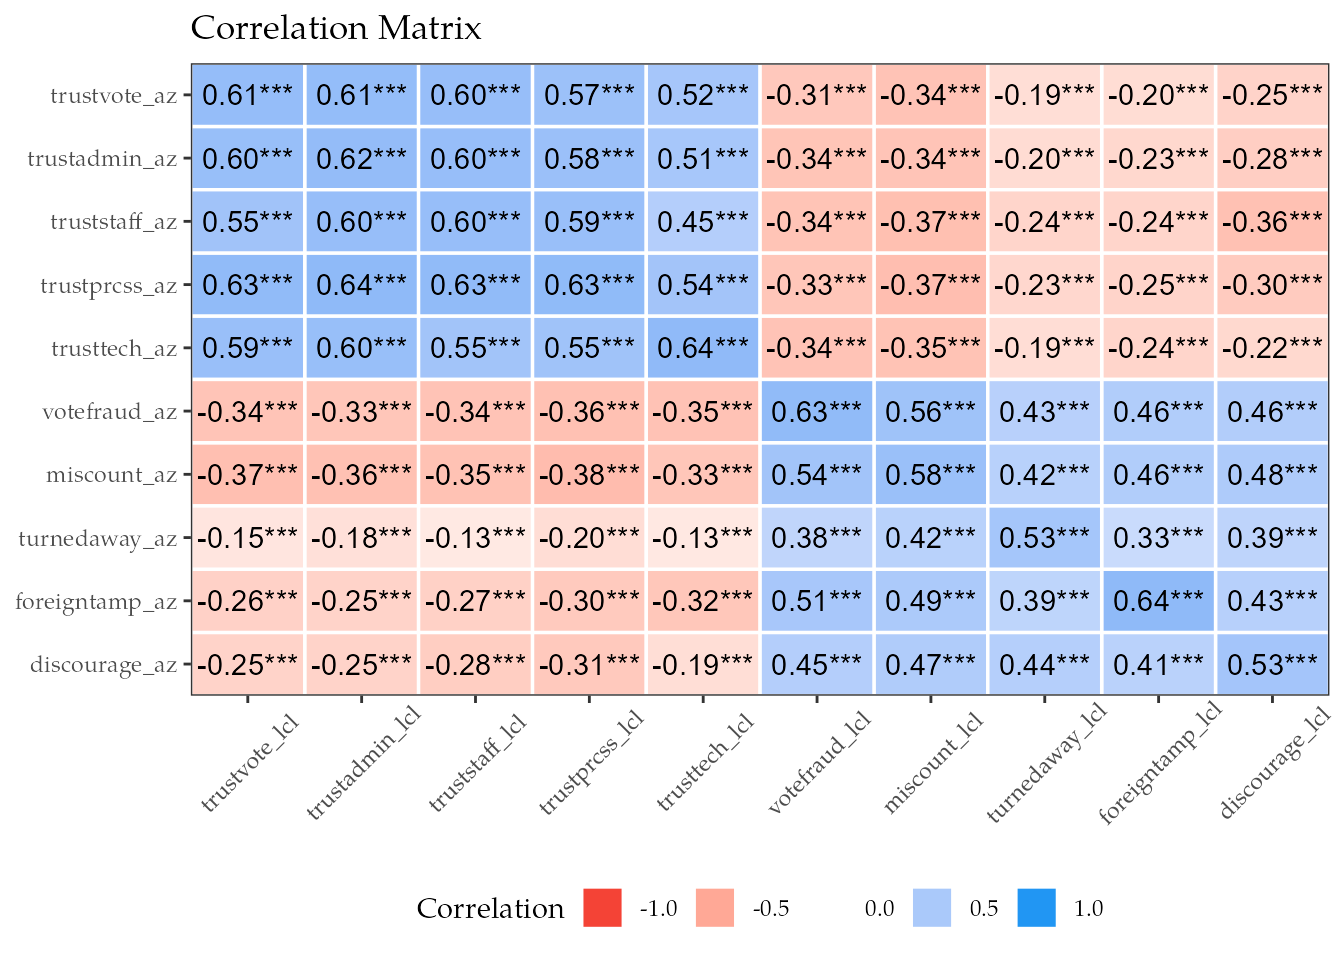

In [ ]:

# Get polychoric item correlation matrix.
item.cor <- data |>
  select(q19:q24, -q23, q28_1:q28_5, q30:q35, -q34, q40_1:q40_5) |> 
  # ensure factors are ordered factors
  mutate(across(where(is.factor), ~factor(., ordered = T))) |> 
  # adjust variable column names of items
  dplyr::rename(
    trustvote_az     = q19,
    trustadmin_az    = q20,
    truststaff_az    = q21,
    trustprcss_az    = q22,
    trusttech_az     = q24,
    votefraud_az     = q28_1,
    miscount_az      = q28_2,
    turnedaway_az    = q28_3,
    foreigntamp_az   = q28_4,
    discourage_az    = q28_5,
    trustvote_lcl    = q30,
    trustadmin_lcl   = q31,
    truststaff_lcl   = q32,
    trustprcss_lcl   = q33,
    trusttech_lcl    = q35,
    votefraud_lcl    = q40_1,
    miscount_lcl     = q40_2,
    turnedaway_lcl   = q40_3,
    foreigntamp_lcl  = q40_4,
    discourage_lcl   = q40_5
  ) |> 
  correlation::correlation(
    select = 
      c("trustvote_az", "trustadmin_az", "truststaff_az", "trustprcss_az", "trusttech_az",
        "votefraud_az", "miscount_az", "turnedaway_az", "foreigntamp_az", "discourage_az"),
    select2 =
      c("trustvote_lcl", "trustadmin_lcl", "truststaff_lcl", "trustprcss_lcl","trusttech_lcl",
        "votefraud_lcl", "miscount_lcl", "turnedaway_lcl", "foreigntamp_lcl","discourage_lcl"),
    method = "polychoric") |>
  summary()

# plot item correlations
plot(item.cor) + theme(axis.text.x = element_text(angle = 45, vjust = 0.6))


## Barplots

In [ ]:

bar_q25 <- custom_barplot(
    data = data,
    x = q25,
    group = group
  ) +
  coord_cartesian(ylim = c(0,60), expand = T)

bar_q26 <- custom_barplot(
  data = data,
  x = q26,
  group = group
)  +
  coord_cartesian(ylim = c(0,60), expand = T)


bar_q36 <- custom_barplot(
  data = data,
  x = q36,
  group = group
)  +
  coord_cartesian(ylim = c(0,60), expand = T)

bar_q37 <- custom_barplot(
  data = data,
  x = q37,
  group = group 
) +
  coord_cartesian(ylim = c(0,60), expand = T)


``` r
#|   - "Concern for Violence in Maricopa County, AZ Elections"
#|   - "Confidence in Voter Saftey at Election Sites in Maricopa County, AZ"

bar_q25
bar_q26
```

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div class="cell-output-display" width="100.0%" data-layout-align="left">
<p>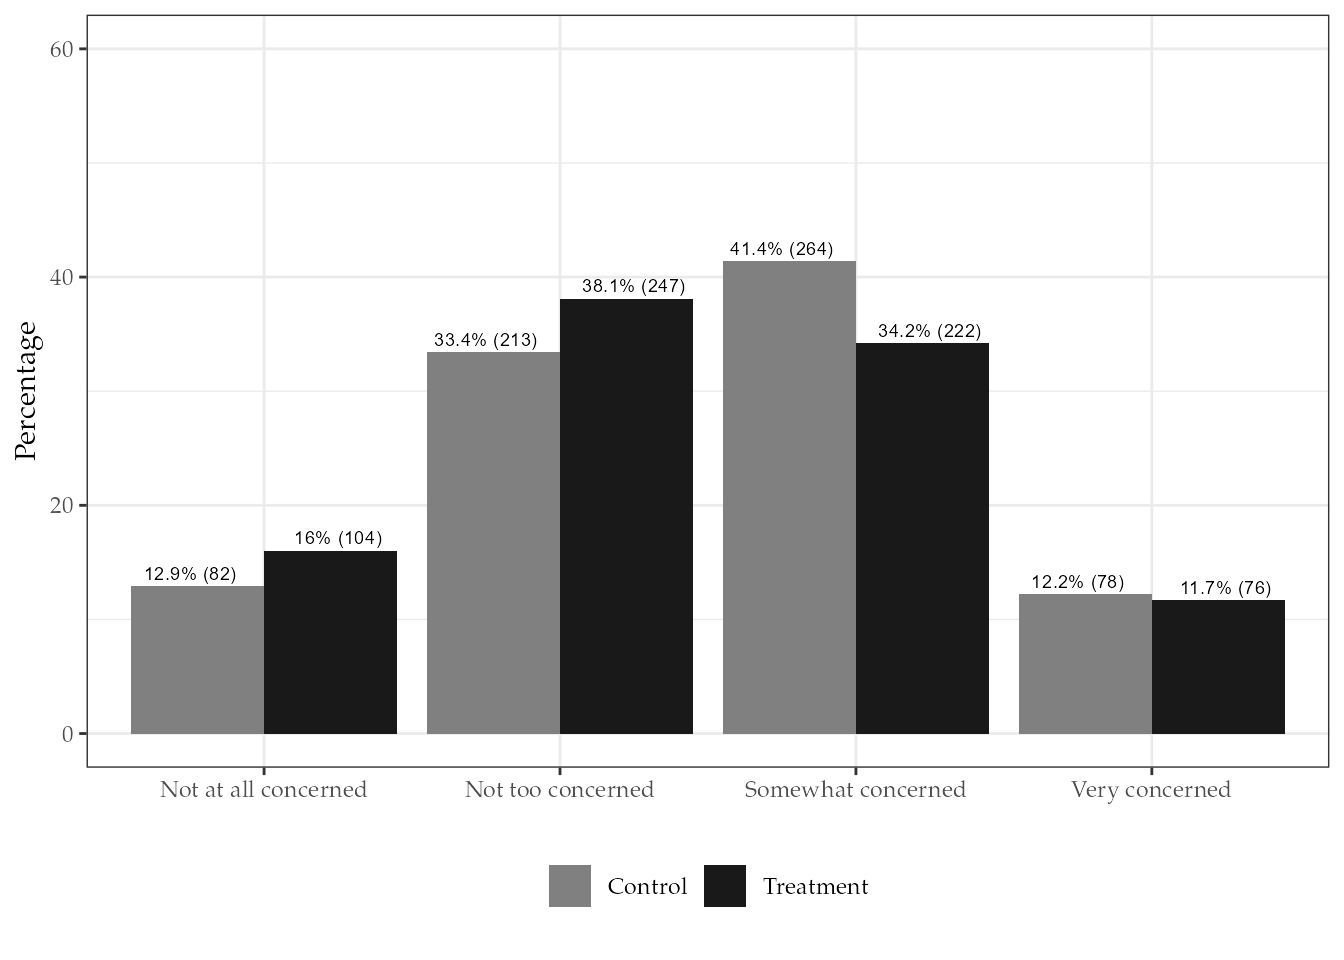</p>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div class="cell-output-display" width="100.0%" data-layout-align="left">
<p>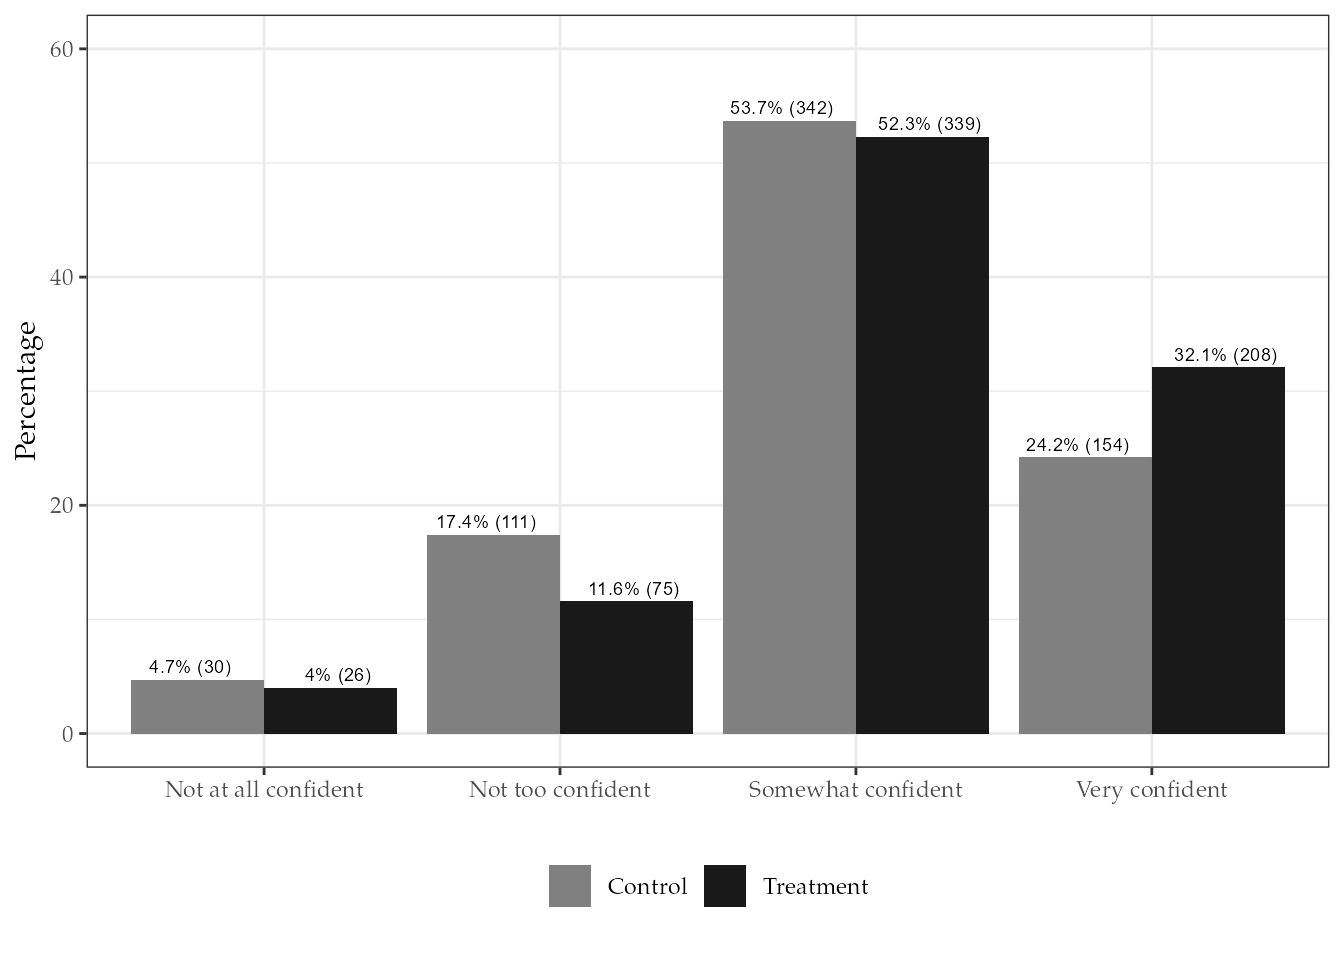</p>
</div></td>
</tr>
</tbody>
</table>

Safety Concerns by Experiment Condition

``` r
#|   - "Concern for Violence in Local Area Elections"
#|   - "Confidence in Voter Saftey at Election Sites in Local Area"

bar_q36
bar_q37
```

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div class="cell-output-display" width="100.0%" data-layout-align="left">
<p>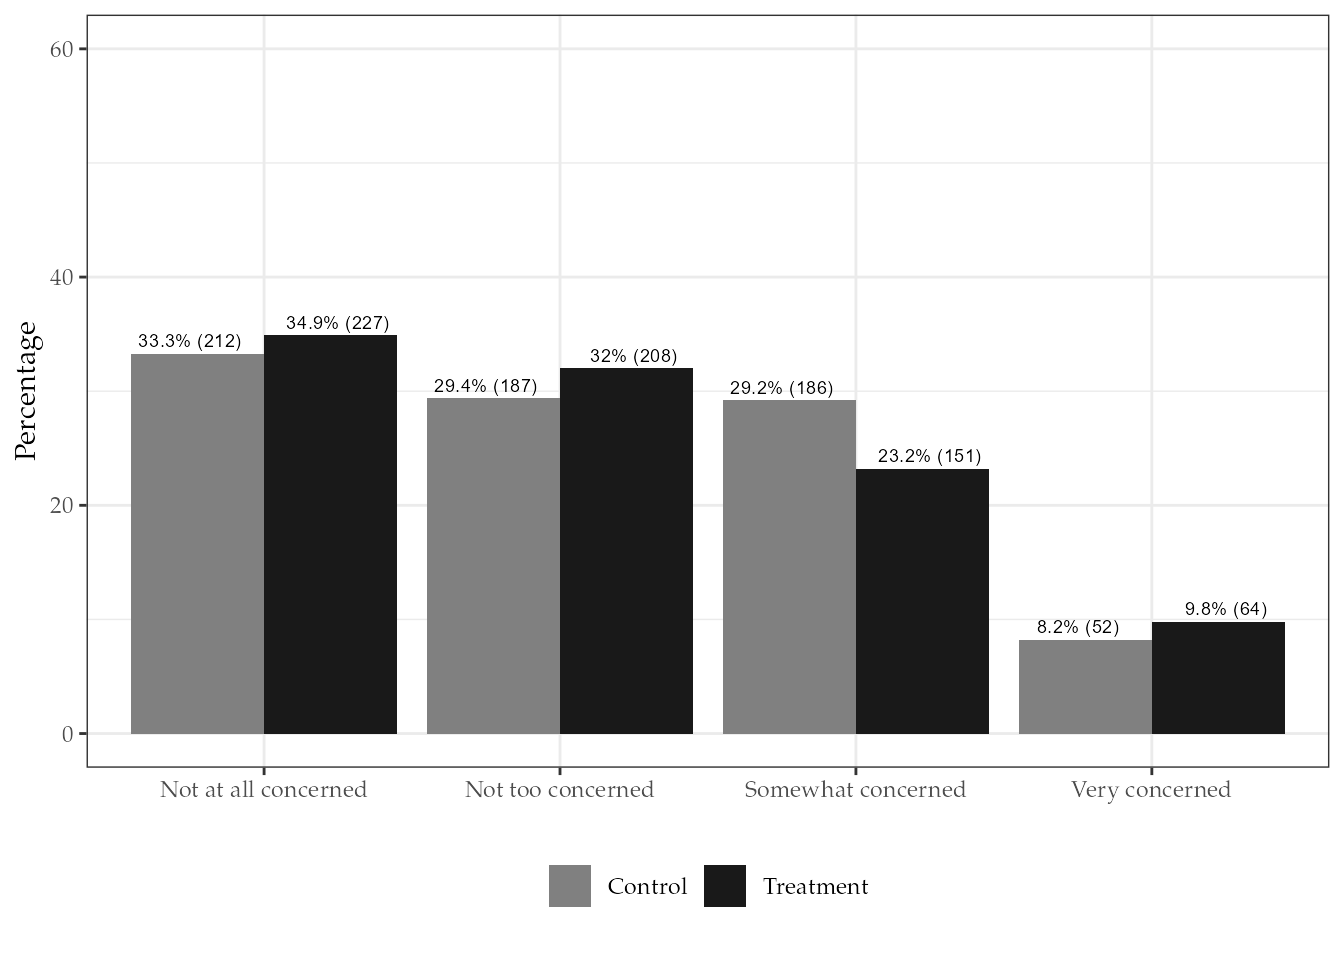</p>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div class="cell-output-display" width="100.0%" data-layout-align="left">
<p>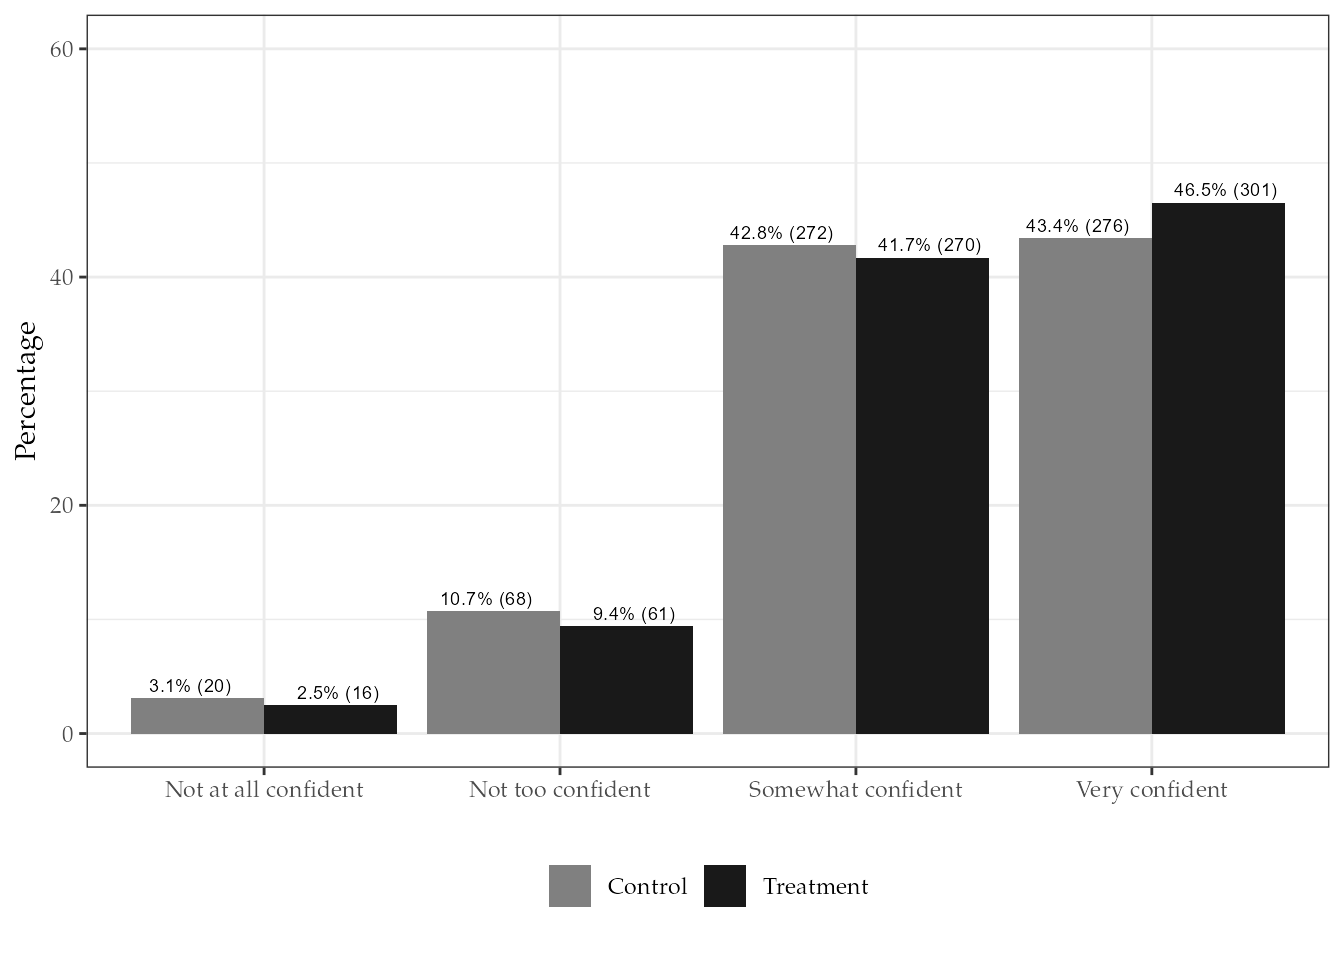</p>
</div></td>
</tr>
</tbody>
</table>

Safety Concerns by Experiment Condition

In [ ]:
#|   - "Concern for Violence in Maricopa County, AZ Elections"
#|   - "Confidence in Voter Saftey at Election Sites in Maricopa County, AZ"

bar_q25 <- custom_barplot(
    data = data,
    x = q25,
    group = group
  ) +
  coord_cartesian(ylim = c(0,60), expand = T)

bar_q26 <- custom_barplot(
  data = data,
  x = q26,
  group = group
)  +
  coord_cartesian(ylim = c(0,60), expand = T)


bar_q36 <- custom_barplot(
  data = data,
  x = q36,
  group = group
)  +
  coord_cartesian(ylim = c(0,60), expand = T)

bar_q37 <- custom_barplot(
  data = data,
  x = q37,
  group = group 
) +
  coord_cartesian(ylim = c(0,60), expand = T)

bars1 <- (bar_q25 + bar_q26)+
  patchwork::plot_layout(guides = "collect") &
  theme(
    text = element_text(family = "TeX Gyre Pagella"),
    legend.position = "bottom", 
    axis.title.y.left = element_blank(), 
    axis.text.y.left = element_blank(), 
    axis.ticks.y = element_blank())

bars2 <- (bar_q36 + bar_q37)+
  patchwork::plot_layout(guides = "collect") &
  theme(
    text = element_text(family = "TeX Gyre Pagella"),
    legend.position = "bottom", 
    axis.title.y.left = element_blank(), 
    axis.text.y.left = element_blank(), 
    axis.ticks.y = element_blank())

bars1
bars2


``` r
#| fig-subcap:
#|    - "Concern for Violence in Maricopa County, AZ Elections"
#|    - "Confidence in Voter Saftey at Election Sites in Maricopa County, AZ"
#|    - "Concern for Violence in Local Area Elections"
#|    - "Confidence in Voter Saftey at Election Sites in Local Area"

bar_q25 <- custom_barplot(data = data, x = q25, group = group)

bar_q26 <- custom_barplot(data = data, x = q26, group = group)

bar_q36 <- custom_barplot(data = data, x = q36, group = group)

bar_q37 <- custom_barplot(data = data, x = q37, group = group)

bar_q25
bar_q26
bar_q36
bar_q37
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div class="cell-output-display" width="50.0%" data-layout-align="left">
<p>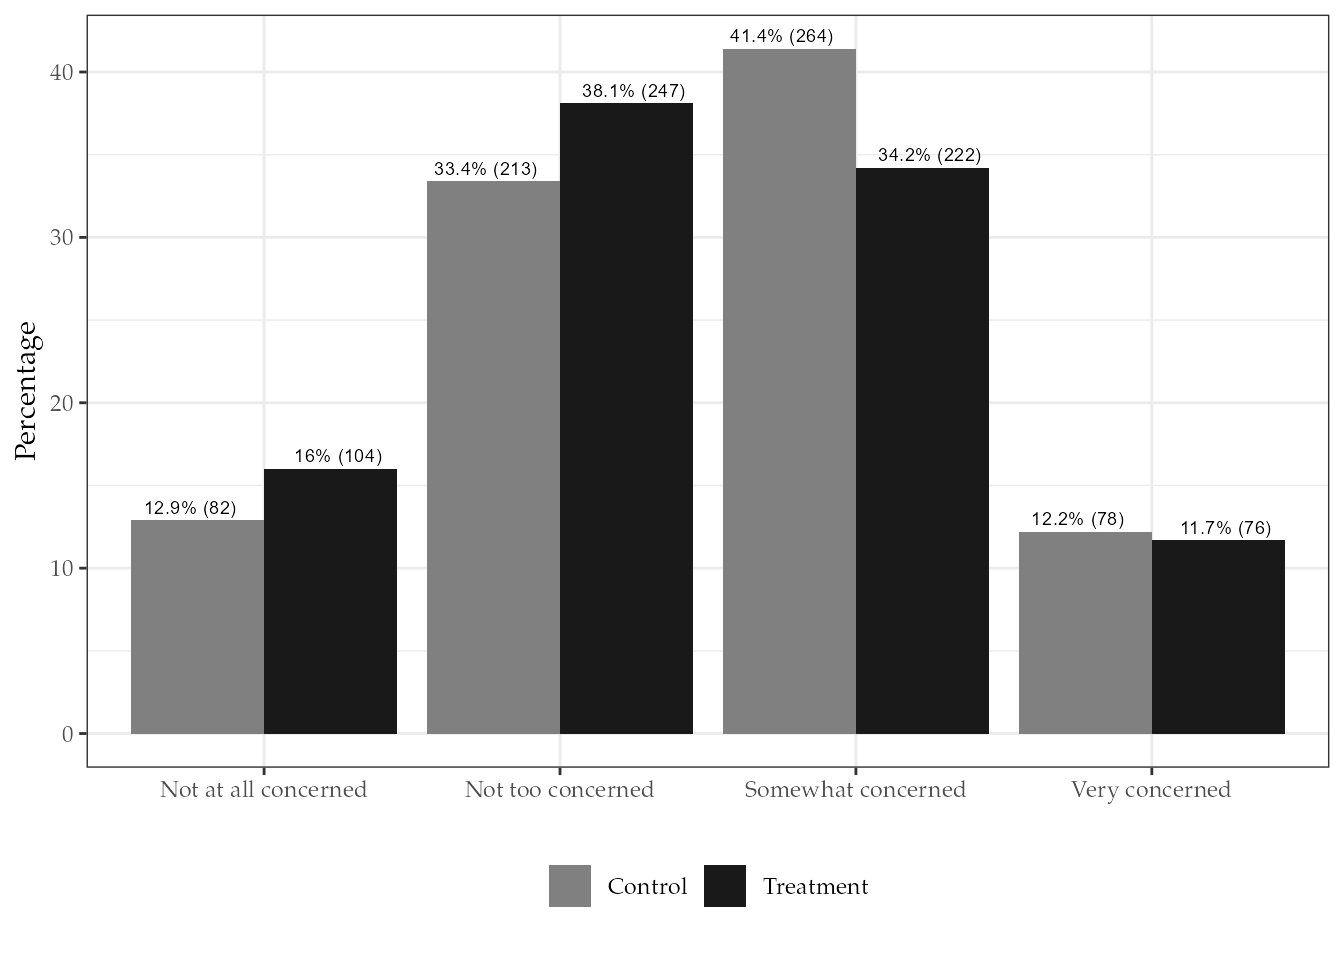</p>
</div></td>
<td style="text-align: left;"><div class="cell-output-display" width="50.0%" data-layout-align="left">
<p>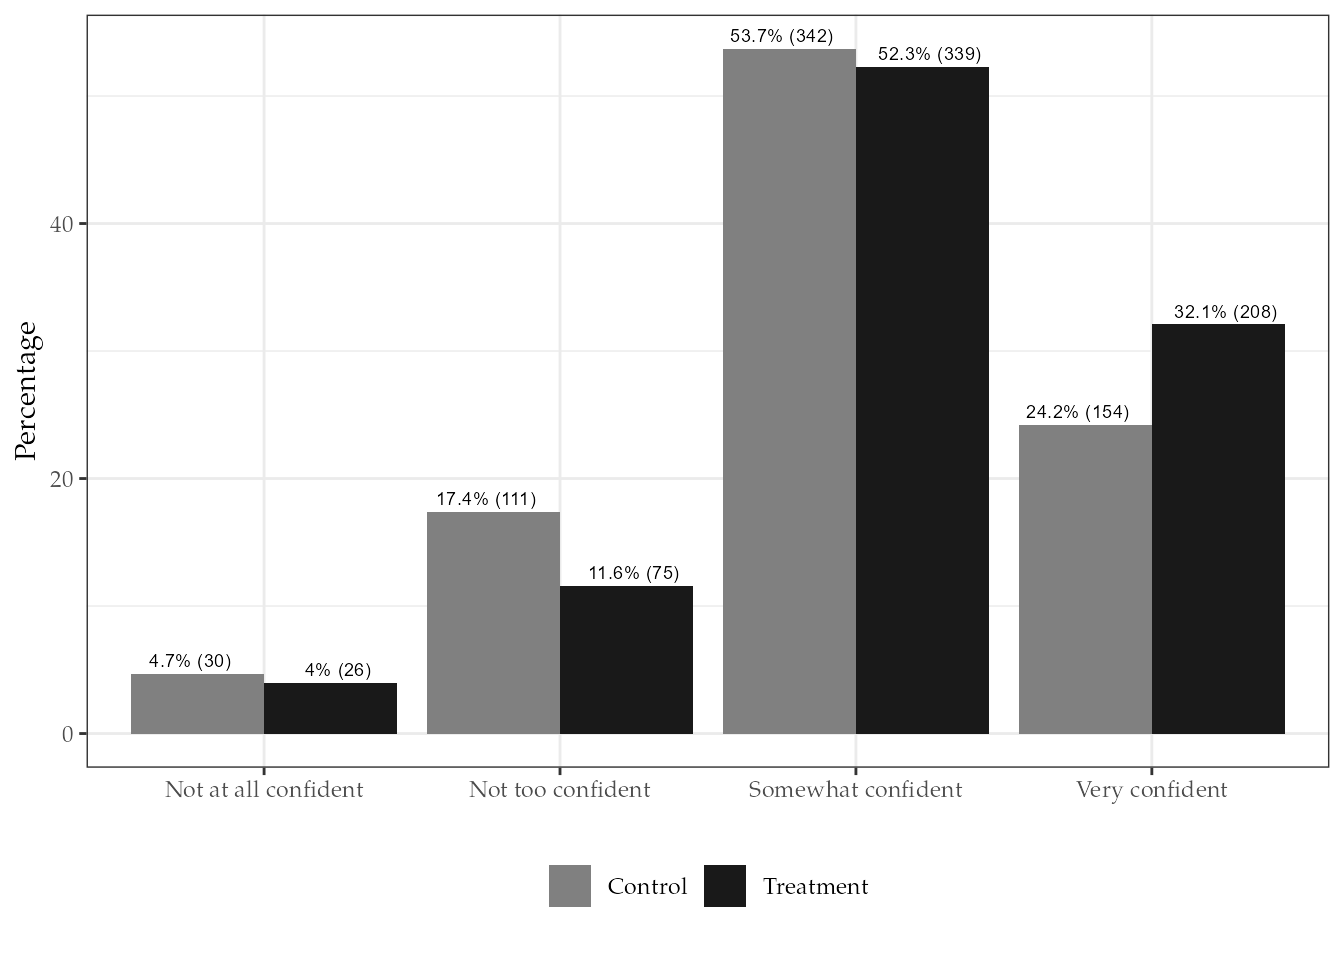</p>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div class="cell-output-display" width="50.0%" data-layout-align="left">
<p>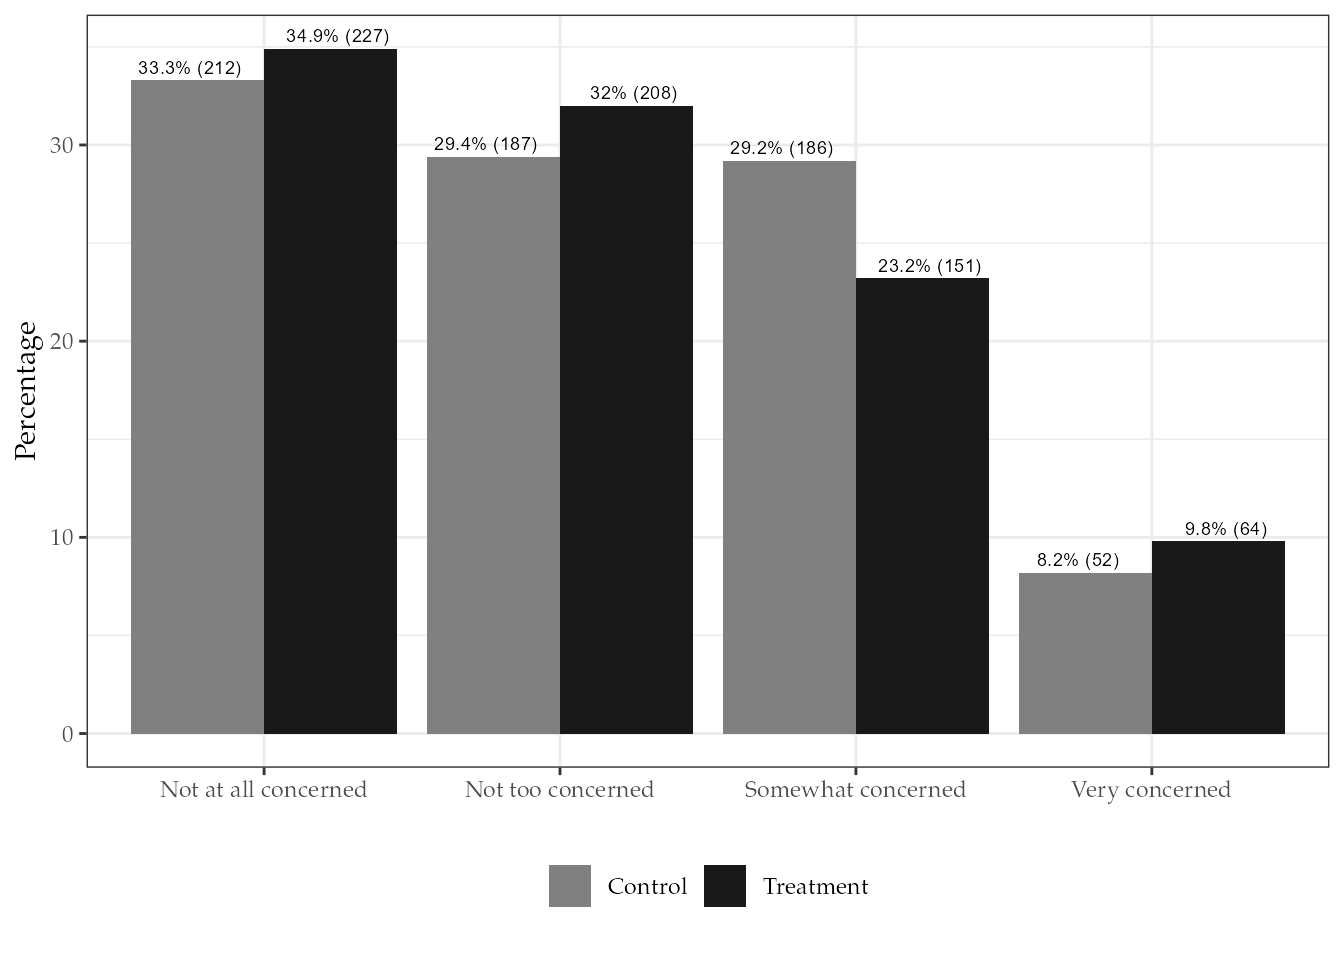</p>
</div></td>
<td style="text-align: left;"><div class="cell-output-display" width="50.0%" data-layout-align="left">
<p>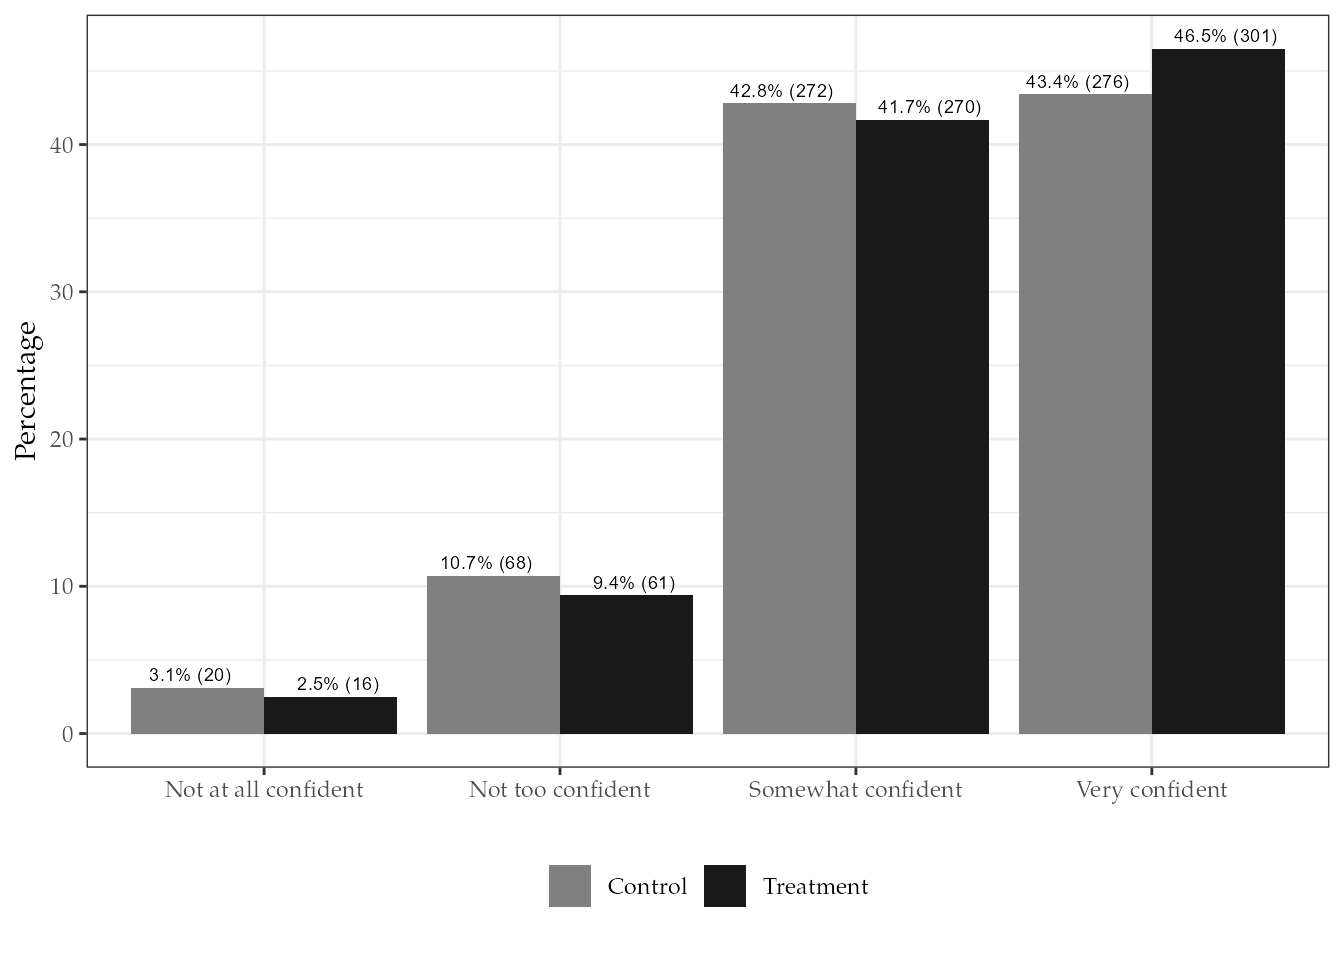</p>
</div></td>
</tr>
</tbody>
</table>

Concerns for Safety